# Dados climatológicos de Recife para prever precipitação
* Classificar, baseado nos dados climatológicos históricos e do dia presente, se o dia seguinte será de chuva ou estiagem

# Importar dados do INMET
* Dados horários de precipitação, pressão atmosférica, temperatura, umidade relativa e comportamento do vento de uma estação meteorológica em Recife, de 2005 até 2018
* https://portal.inmet.gov.br/dadoshistoricos

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
data_path = '/content/gdrive/Shareddrives/AVD/ATV-MOD2/chuva-recife/data'
intermediate_path = '/content/gdrive/Shareddrives/AVD/ATV-MOD2/chuva-recife/intermediate'

In [ ]:
import os

files = os.listdir(data_path)
file_paths = [os.path.join(data_path, basename) for basename in files]

In [ ]:
chuva = pd.concat((pd.read_csv(f, sep=';', encoding='latin-1', skiprows=8) for f in file_paths), ignore_index=True)

# Tratamento inicial dos dados
* Identificação de valores ausentes
* Conversão de tipos para análise explorátoria

In [ ]:
display(chuva.head())

col_map = {k: v for k, v in enumerate(chuva.iloc[:, :-1].columns)}
print(col_map)

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2005-01-01,00:00,0,"1012,5","1012,6","1012,4",-9999,"25,8","20,2","26,3","25,8","20,2","19,7",71,68,71,116,4,"1,4",NaN
1,2005-01-01,01:00,0,"1012,4","1012,6","1012,4",-9999,26,"20,1","26,1","25,8","20,2","19,8",71,69,70,102,"4,3",2,NaN
2,2005-01-01,02:00,0,"1012,1","1012,4","1012,1",-9999,"25,8","20,2","26,1","25,8","20,3",20,71,70,71,99,"4,3","1,5",NaN
3,2005-01-01,03:00,0,"1011,8","1012,1","1011,8",-9999,"25,1",20,"25,8","25,1","20,3",20,74,71,73,105,"3,5","1,3",NaN
4,2005-01-01,04:00,0,"1011,4","1011,8","1011,4",-9999,"24,8","20,3","25,3","24,6","20,4","19,9",78,72,76,79,"3,4",",7",NaN


{0: 'DATA (YYYY-MM-DD)', 1: 'HORA (UTC)', 2: 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 3: 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 4: 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 5: 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 6: 'RADIACAO GLOBAL (KJ/m²)', 7: 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 8: 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 9: 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 10: 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 11: 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 12: 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 13: 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 14: 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 15: 'UMIDADE RELATIVA DO AR, HORARIA (%)', 16: 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 17: 'VENTO, RAJADA MAXIMA (m/s)', 18: 'VENTO, VELOCIDADE HORARIA (m/s)'}


,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2005-01-01,00:00,0,"1012,5","1012,6","1012,4",NaN,"25,8","20,2","26,3","25,8","20,2","19,7",71.0,68.0,71.0,116.0,4,"1,4"
1,2005-01-01,01:00,0,"1012,4","1012,6","1012,4",NaN,26,"20,1","26,1","25,8","20,2","19,8",71.0,69.0,70.0,102.0,"4,3",2
2,2005-01-01,02:00,0,"1012,1","1012,4","1012,1",NaN,"25,8","20,2","26,1","25,8","20,3",20,71.0,70.0,71.0,99.0,"4,3","1,5"
3,2005-01-01,03:00,0,"1011,8","1012,1","1011,8",NaN,"25,1",20,"25,8","25,1","20,3",20,74.0,71.0,73.0,105.0,"3,5","1,3"
4,2005-01-01,04:00,0,"1011,4","1011,8","1011,4",NaN,"24,8","20,3","25,3","24,6","20,4","19,9",78.0,72.0,76.0,79.0,"3,4",",7"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122707,2018-12-31,19:00,0,"1010,3","1010,3",1010,"2489,1","29,1","21,5","30,9","29,1","22,1",21,64.0,57.0,64.0,106.0,"5,5","2,2"
122708,2018-12-31,20:00,0,"1010,8","1010,8","1010,3","655,3",28,"21,4","29,2",28,"21,9","21,4",68.0,64.0,68.0,109.0,"5,1","1,9"
122709,2018-12-31,21:00,0,"1011,3","1011,3","1010,8","44,9","27,1",22,28,"27,1",22,"21,4",74.0,68.0,74.0,120.0,"5,4","1,6"
122710,2018-12-31,22:00,0,"1012,2","1012,2","1011,3",NaN,27,"22,3","27,2","26,9","22,4","22,1",76.0,74.0,76.0,120.0,"5,2","1,9"


DATA (YYYY-MM-DD)                                         object
HORA (UTC)                                                 int32
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (KJ/m²)                                  float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, H

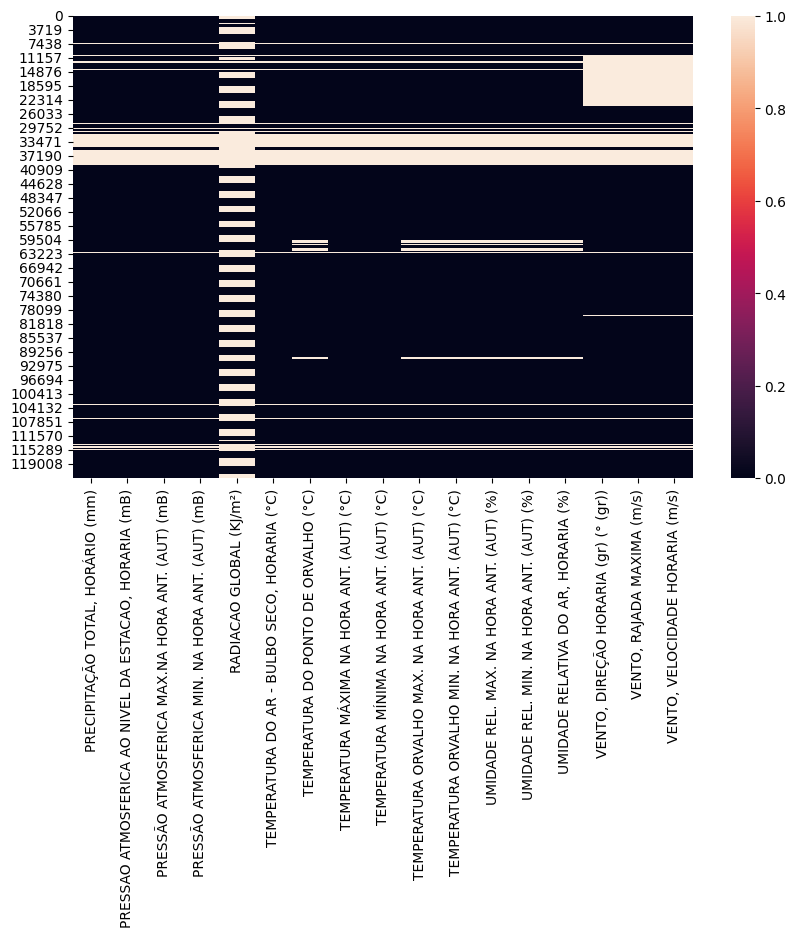

Number of rows: 122712
Number of columns: 19


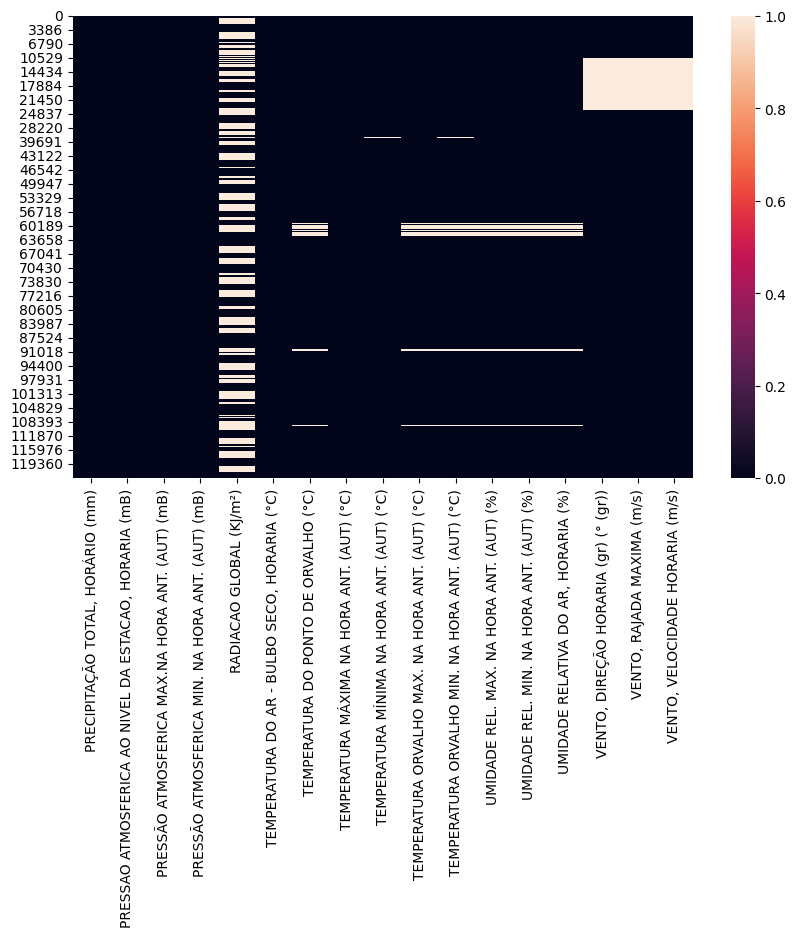

Number of rows: 111575
Number of columns: 19


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

chuva_dropped = chuva.copy().iloc[:, :-1]

chuva_dropped.replace('-9999', np.nan, inplace=True)
chuva_dropped.replace(-9999, np.nan, inplace=True)

chuva_dropped.dropna(subset=['HORA (UTC)'], inplace=True)

display(chuva_dropped)

date_col = chuva_dropped.columns[0]
time_col = chuva_dropped.columns[1]

chuva_dropped[date_col] = pd.to_datetime(chuva_dropped[date_col], format='%Y-%m-%d')
chuva_dropped[time_col] = chuva_dropped[time_col].str.split(':').str[0].astype(int)

# Adjust time for UTC-3 by shifting 3 hours back
chuva_dropped['datetime_utc'] = chuva_dropped.apply(
    lambda row: row[date_col] + pd.Timedelta(hours=row[time_col]), axis=1
)
chuva_dropped['datetime_recife'] = chuva_dropped['datetime_utc'] - pd.Timedelta(hours=3)

# Extract the adjusted date and hour columns
chuva_dropped[date_col] = chuva_dropped['datetime_recife'].dt.date
chuva_dropped[time_col] = chuva_dropped['datetime_recife'].dt.hour

# Drop intermediate datetime columns
chuva_dropped.drop(columns=['datetime_utc', 'datetime_recife'], inplace=True)

for col in chuva_dropped.columns.drop([date_col, time_col]):
    chuva_dropped[col] = chuva_dropped[col].astype(str).str.replace(',', '.').str.strip().astype(float)

print(chuva_dropped.dtypes)

plt.figure(figsize=(10, 6))
sns.heatmap(chuva_dropped.iloc[:, 2:].isnull())
plt.show()

print(f"Number of rows: {chuva_dropped.shape[0]}")
print(f"Number of columns: {chuva_dropped.shape[1]}")

print('='*100)

# Drop rows where there is no usable data on any column
chuva_dropped.dropna(subset=chuva_dropped.columns[2:], how='all', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(chuva_dropped.iloc[:, 2:].isnull())
plt.show()

print(f"Number of rows: {chuva_dropped.shape[0]}")
print(f"Number of columns: {chuva_dropped.shape[1]}")

# Exploração da multicolinearidade entre variáveis
* Eliminação de variáveis supérfluas (pois quase perfeitamente correlacionadas com outras)

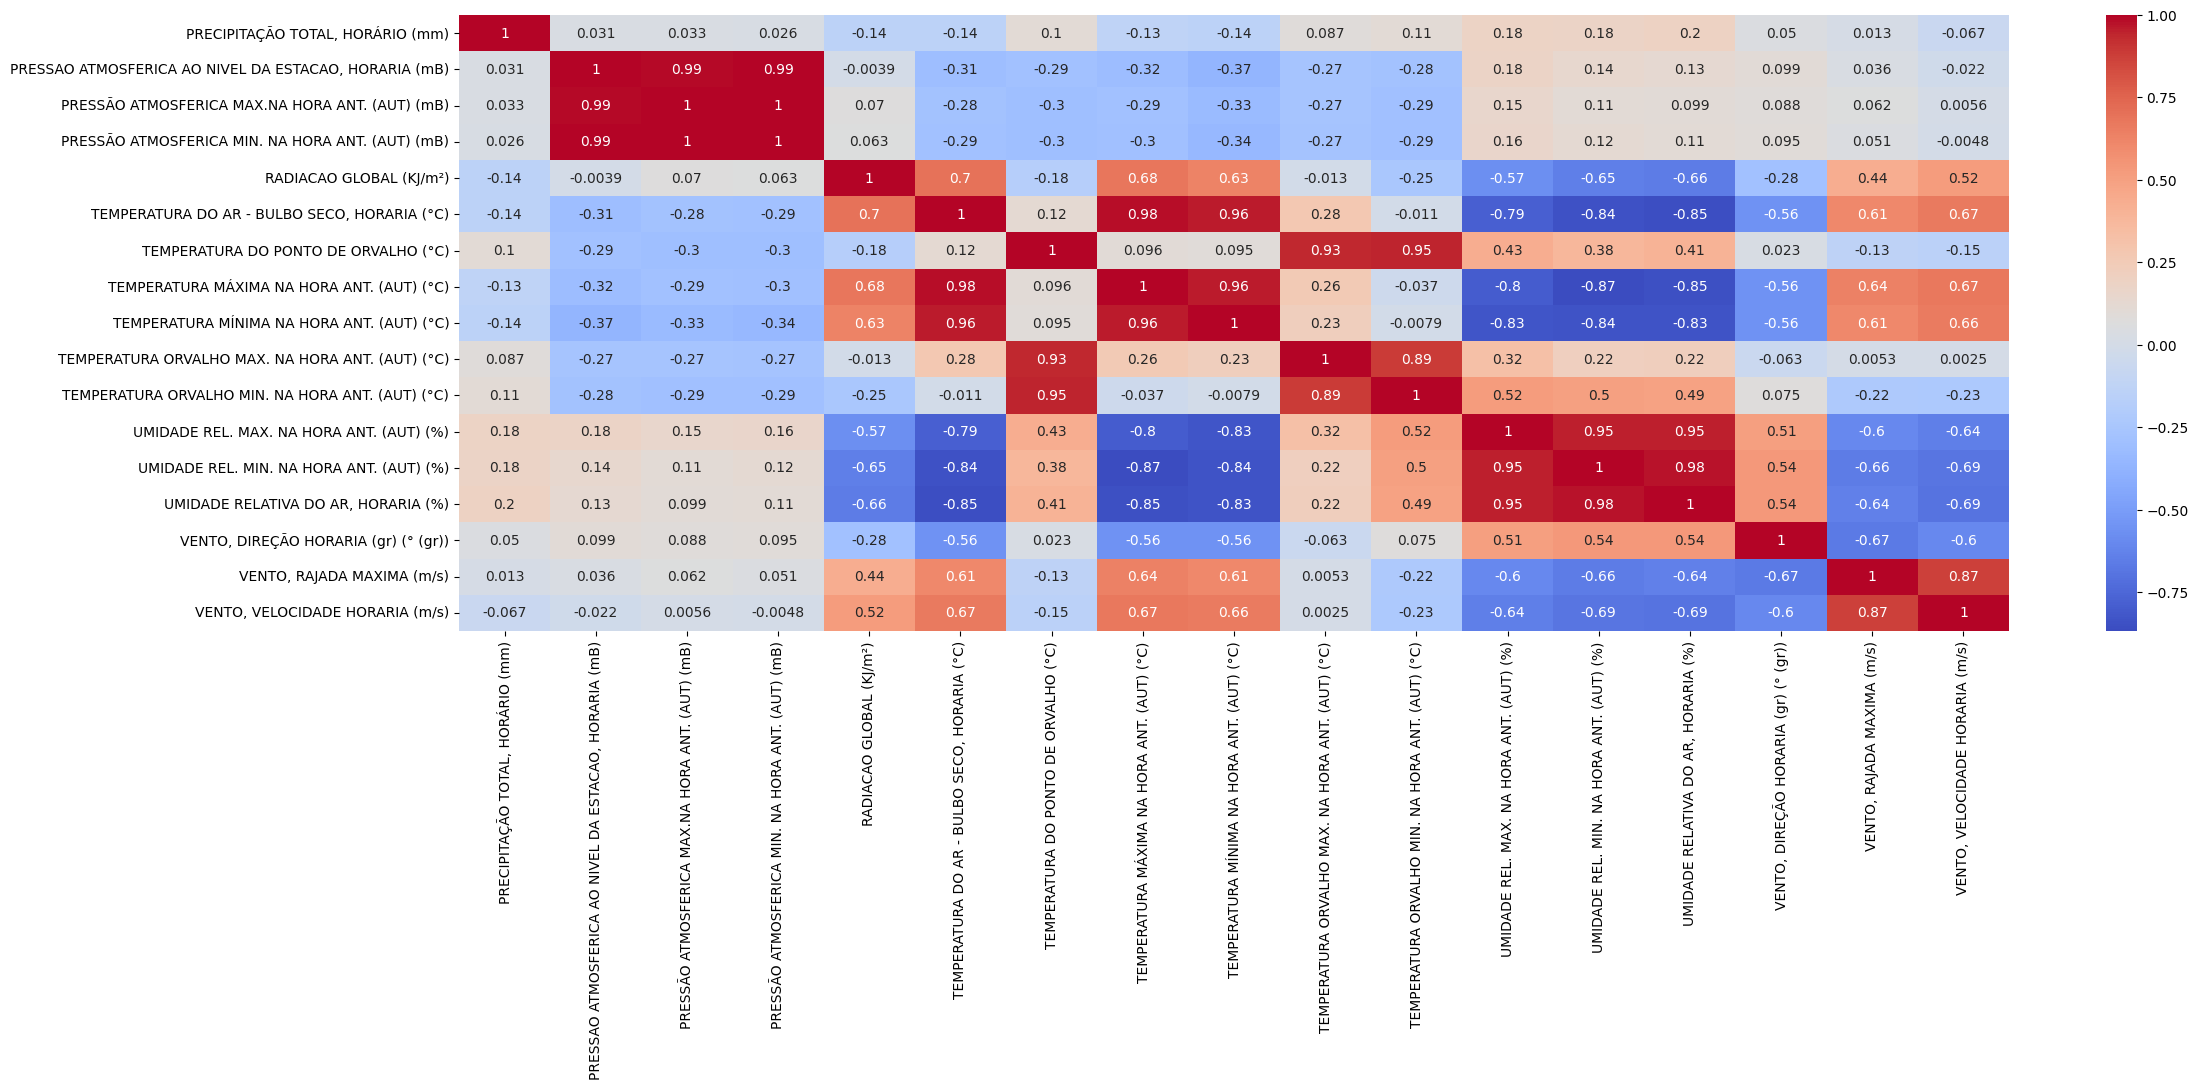

In [ ]:
chuva_raw_corr = chuva_dropped.drop(columns=chuva_dropped.columns[0:2]).corr()
plt.figure(figsize=(25, 8))
sns.heatmap(chuva_raw_corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
col_map = {k: v for k, v in enumerate(chuva_dropped.iloc[:, :-1].columns)}
print(col_map)

{0: 'DATA (YYYY-MM-DD)', 1: 'HORA (UTC)', 2: 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 3: 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 4: 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 5: 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 6: 'RADIACAO GLOBAL (KJ/m²)', 7: 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 8: 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 9: 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 10: 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 11: 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 12: 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 13: 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 14: 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 15: 'UMIDADE RELATIVA DO AR, HORARIA (%)', 16: 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 17: 'VENTO, RAJADA MAXIMA (m/s)'}


In [ ]:
chuva_summary = chuva_dropped.copy()

chuva_summary = chuva_summary.iloc[:, [0, 1, 2, 3, 6, 7, 8, 15, 16, 18]]
chuva_summary.columns = ['data', 'hora', 'precipitacao', 'pressao_atm', 'radiacao', 'temp_bulbo', 'temp_orvalho', 'umidade_rel', 'vento_dir', 'vento_vel']
chuva_summary.to_csv(os.path.join(intermediate_path, 'chuva_summary.csv'), index=False)
chuva_summary

,data,hora,precipitacao,pressao_atm,radiacao,temp_bulbo,temp_orvalho,umidade_rel,vento_dir,vento_vel
0,2004-12-31,21,0.0,1012.5,NaN,25.8,20.2,71.0,116.0,1.4
1,2004-12-31,22,0.0,1012.4,NaN,26.0,20.1,70.0,102.0,2.0
2,2004-12-31,23,0.0,1012.1,NaN,25.8,20.2,71.0,99.0,1.5
3,2005-01-01,0,0.0,1011.8,NaN,25.1,20.0,73.0,105.0,1.3
4,2005-01-01,1,0.0,1011.4,NaN,24.8,20.3,76.0,79.0,0.7
...,...,...,...,...,...,...,...,...,...,...
122707,2018-12-31,16,0.0,1010.3,2489.1,29.1,21.5,64.0,106.0,2.2
122708,2018-12-31,17,0.0,1010.8,655.3,28.0,21.4,68.0,109.0,1.9
122709,2018-12-31,18,0.0,1011.3,44.9,27.1,22.0,74.0,120.0,1.6
122710,2018-12-31,19,0.0,1012.2,NaN,27.0,22.3,76.0,120.0,1.9


# Conferência da cobertura de cada variável
* Quantas observações horárias
* Distribuição das observações por hora do dia
* Quantas observações (em número de horas) por dias do ano (cobertura de sazonalidade)
* Valor médio das variáveis observadas

In [ ]:
chuva_summary = pd.read_csv(os.path.join(intermediate_path, 'chuva_summary.csv'))
chuva_summary['data'] = pd.to_datetime(chuva_summary['data'])

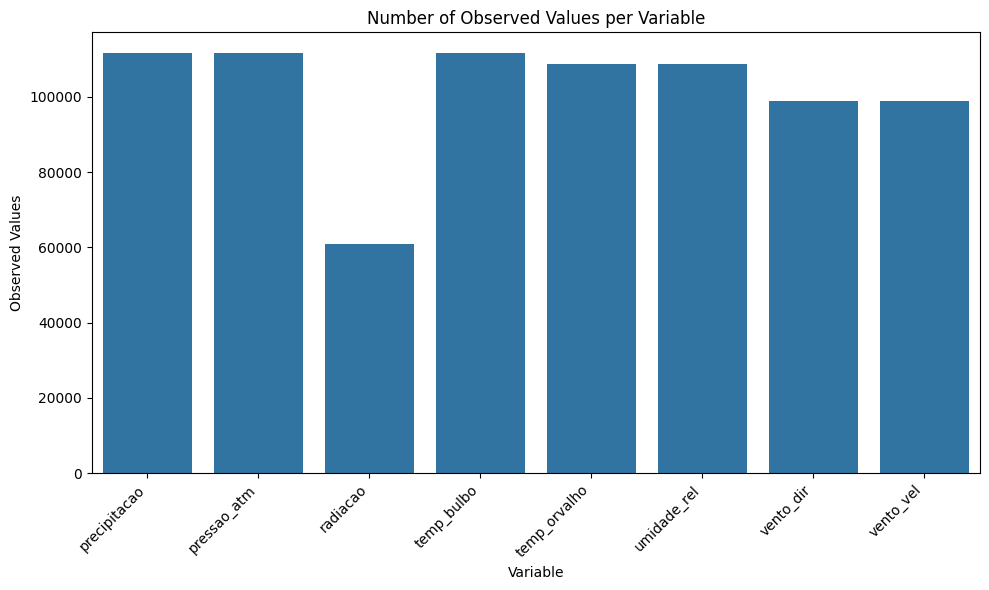

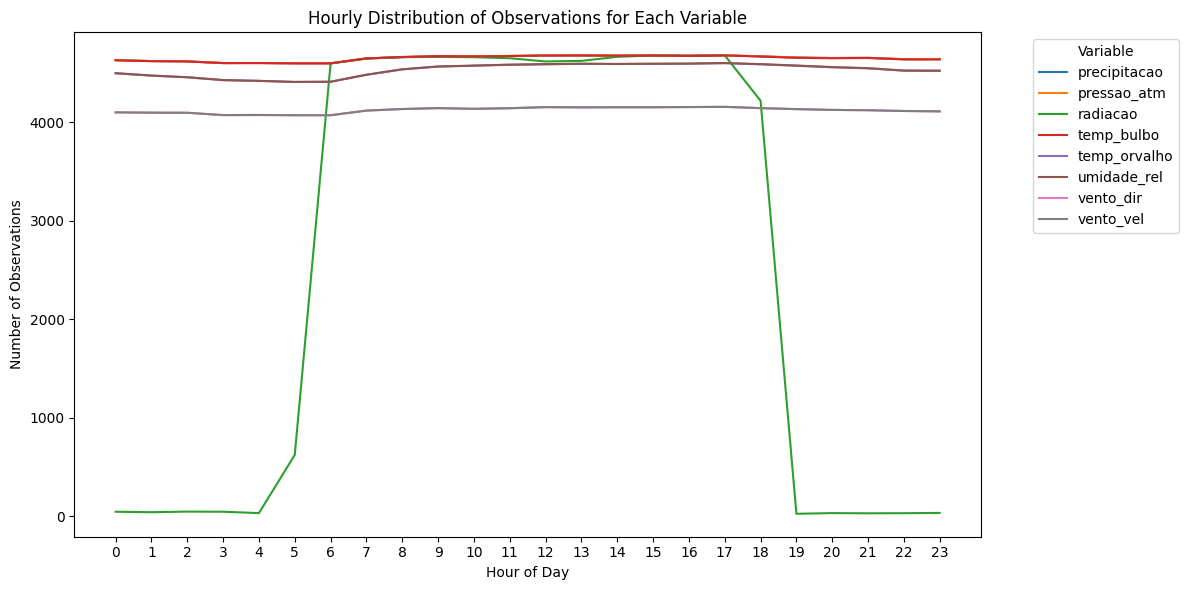

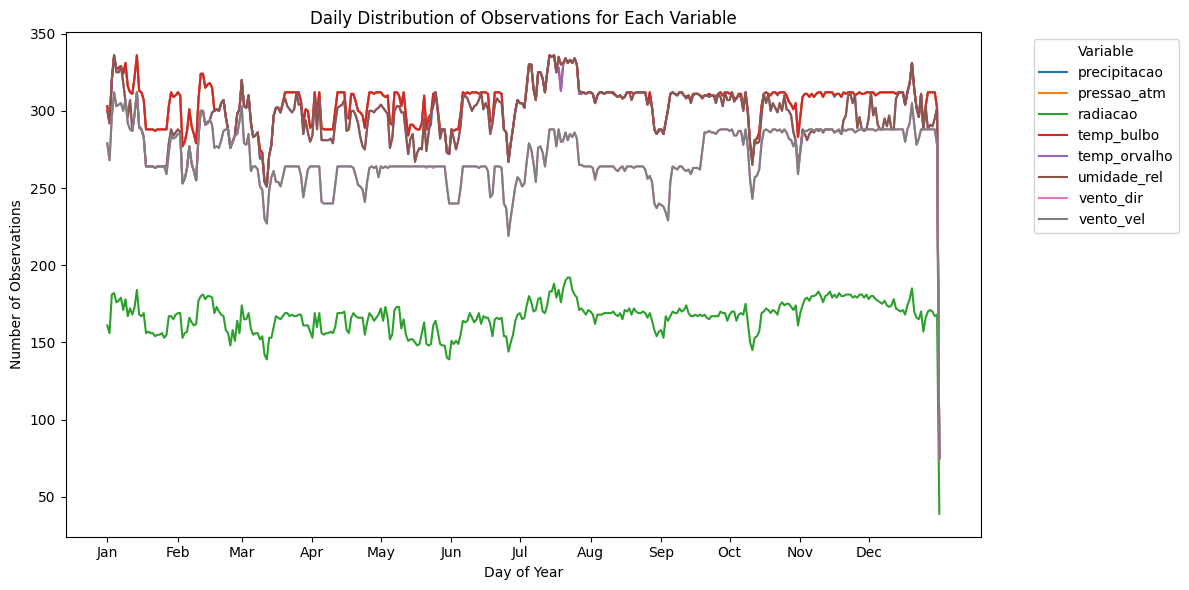

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the number of observed values for each column (excluding 'data' and 'hora')
observed_counts = chuva_summary.drop(columns=['data', 'hora']).count()

# Convert the Series to a DataFrame for easier plotting with seaborn
observed_counts_df = pd.DataFrame({'Variable': observed_counts.index, 'Observed Values': observed_counts.values})

plt.figure(figsize=(10, 6))
# Create the bar plot using the DataFrame
sns.barplot(x='Variable', y='Observed Values', data=observed_counts_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Number of Observed Values per Variable')
plt.tight_layout()
plt.show()

print('\n\n')

# Group data by 'hora' and count observations for each variable
hourly_counts = chuva_summary.groupby('hora').count().drop(columns=['data'])

# Reshape data for plotting
hourly_counts = hourly_counts.reset_index().melt(id_vars=['hora'], var_name='Variable', value_name='Observations')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hora', y='Observations', hue='Variable', data=hourly_counts)
plt.title('Hourly Distribution of Observations for Each Variable')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Observations')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.xticks(range(24))
plt.tight_layout()
plt.show()

print('\n\n')

# Extract day of the year from 'data' column
chuva_temp = chuva_summary.copy()
chuva_temp['day_of_year'] = pd.to_datetime(chuva_temp['data']).dt.dayofyear

# Group data by 'day_of_year' and count observations for each variable
daily_counts = chuva_temp.groupby('day_of_year').count().drop(columns=['data', 'hora'])

# Reshape data for plotting
daily_counts = daily_counts.reset_index().melt(id_vars=['day_of_year'], var_name='Variable', value_name='Observations')

months_first_day = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_year', y='Observations', hue='Variable', data=daily_counts)
plt.title('Daily Distribution of Observations for Each Variable')
plt.xlabel('Day of Year')
plt.ylabel('Number of Observations')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.xticks(months_first_day, months_labels)
plt.show()

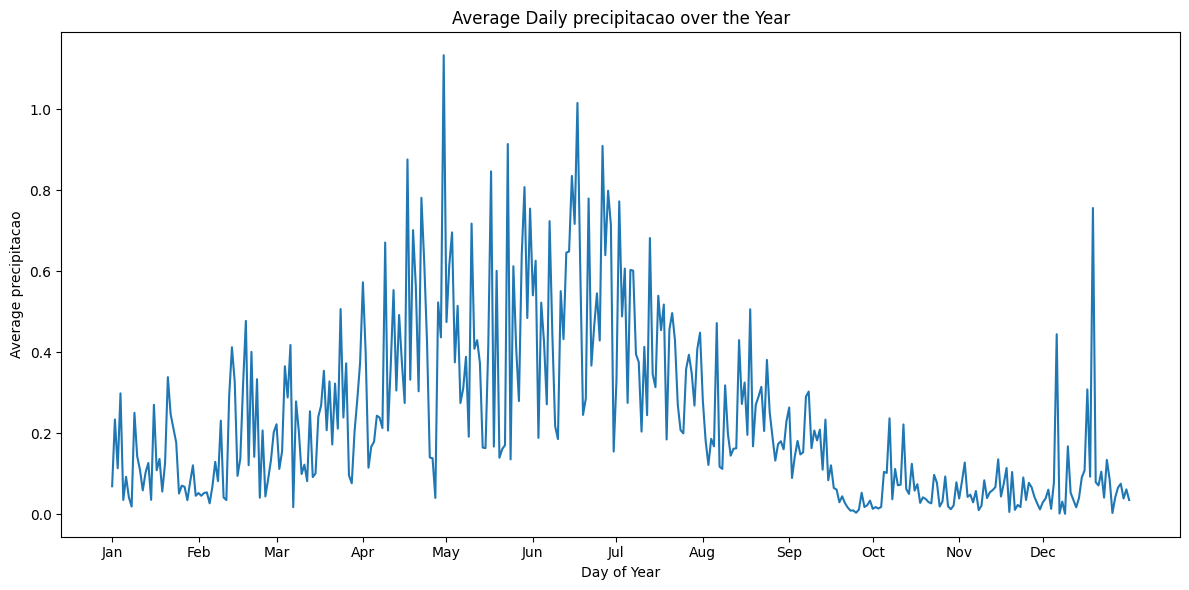

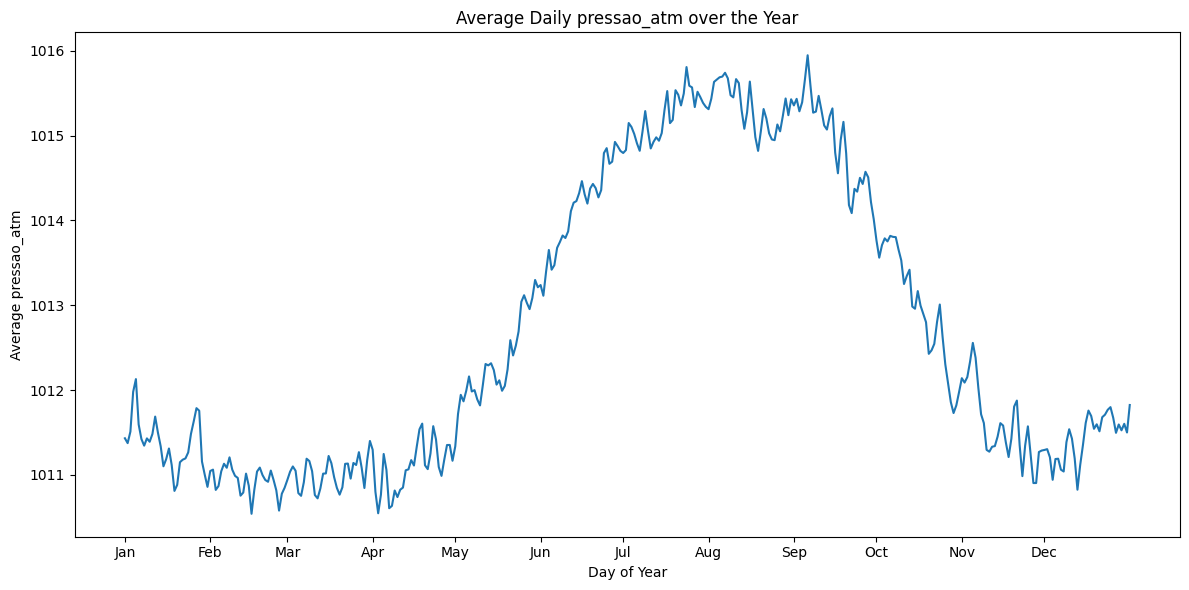

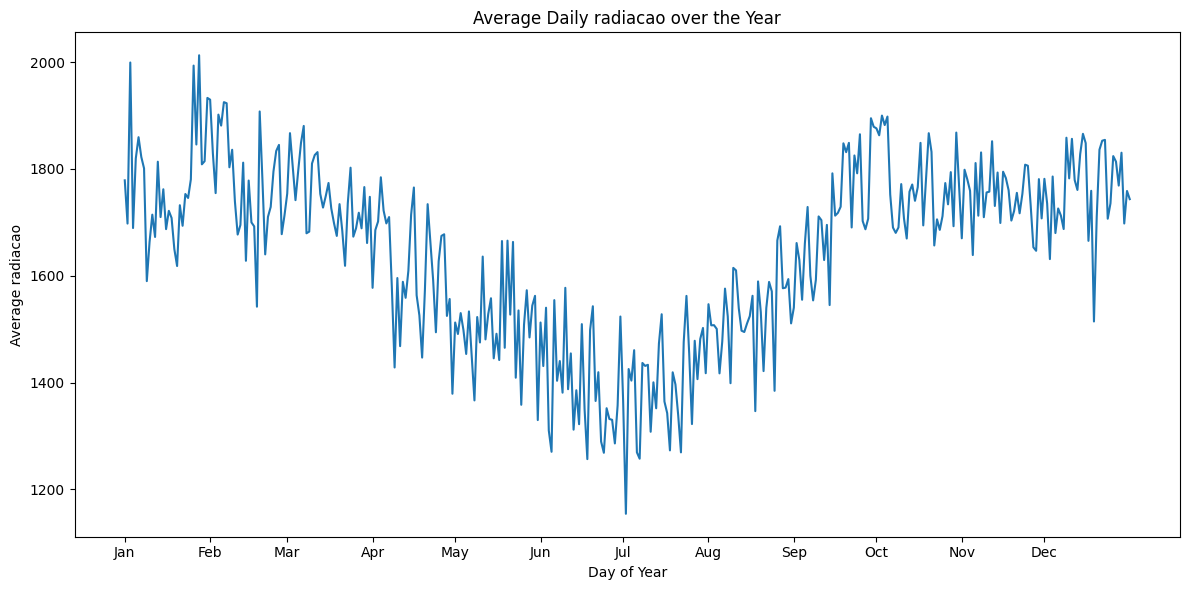

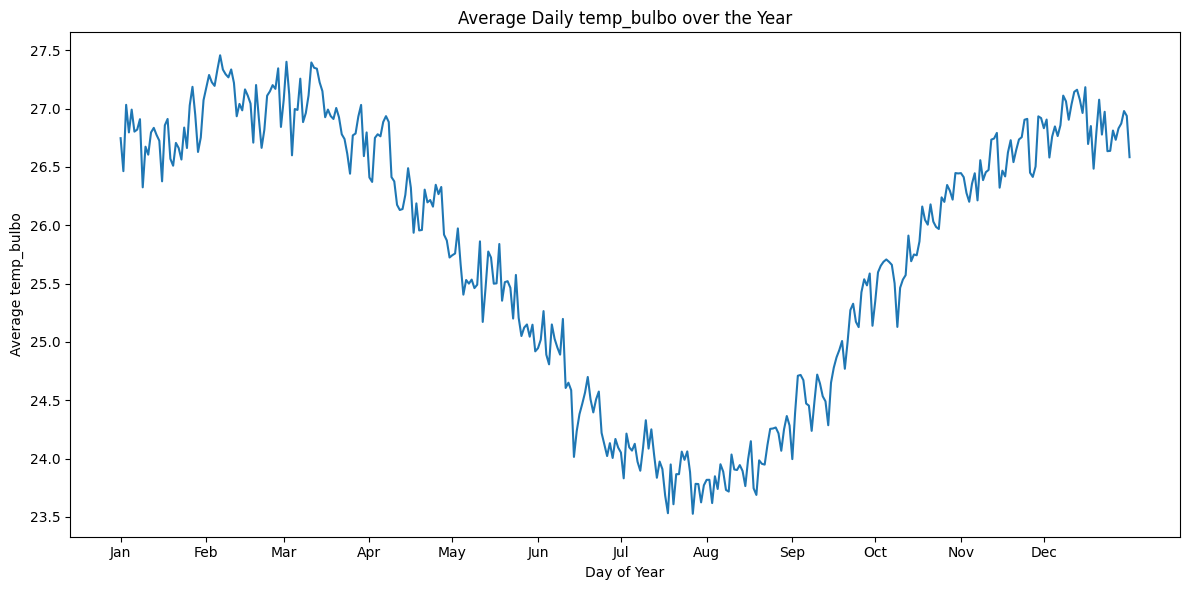

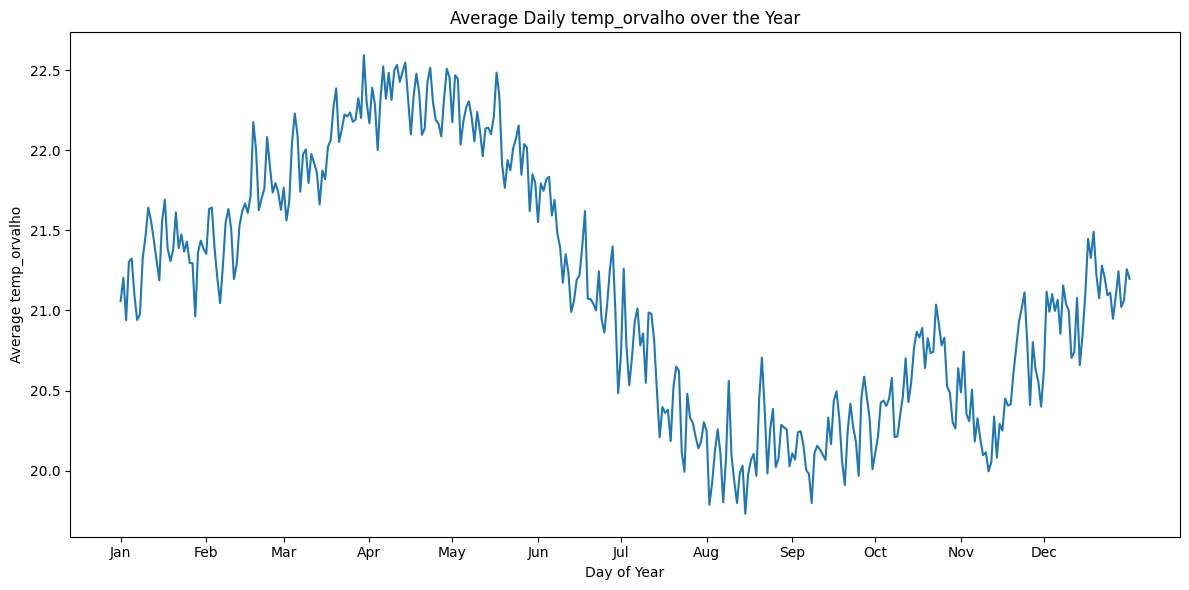

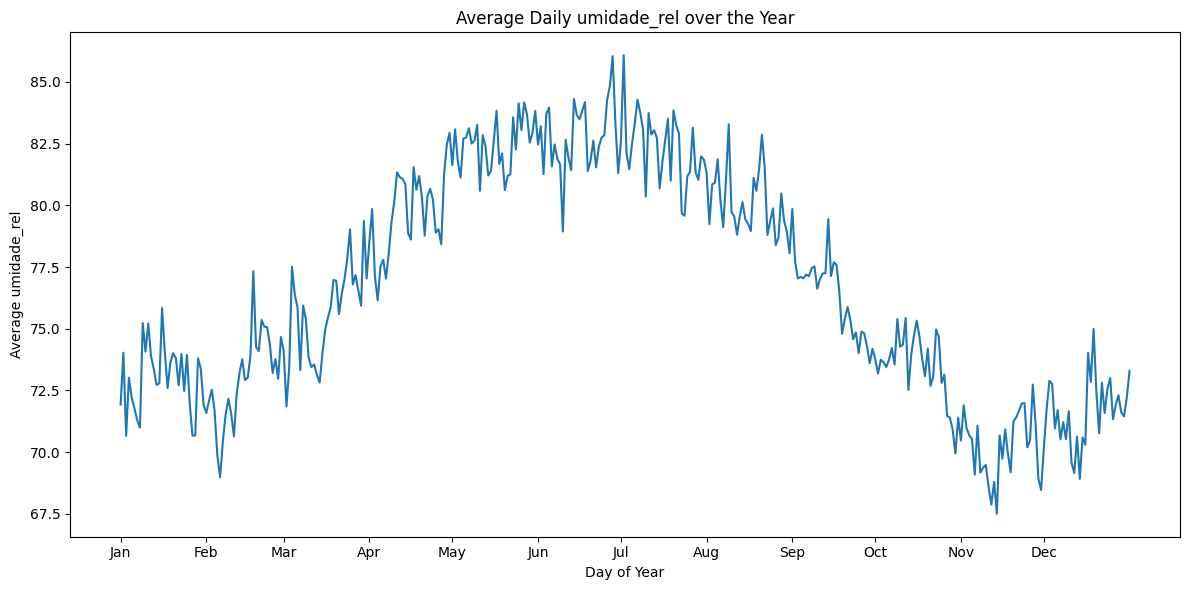

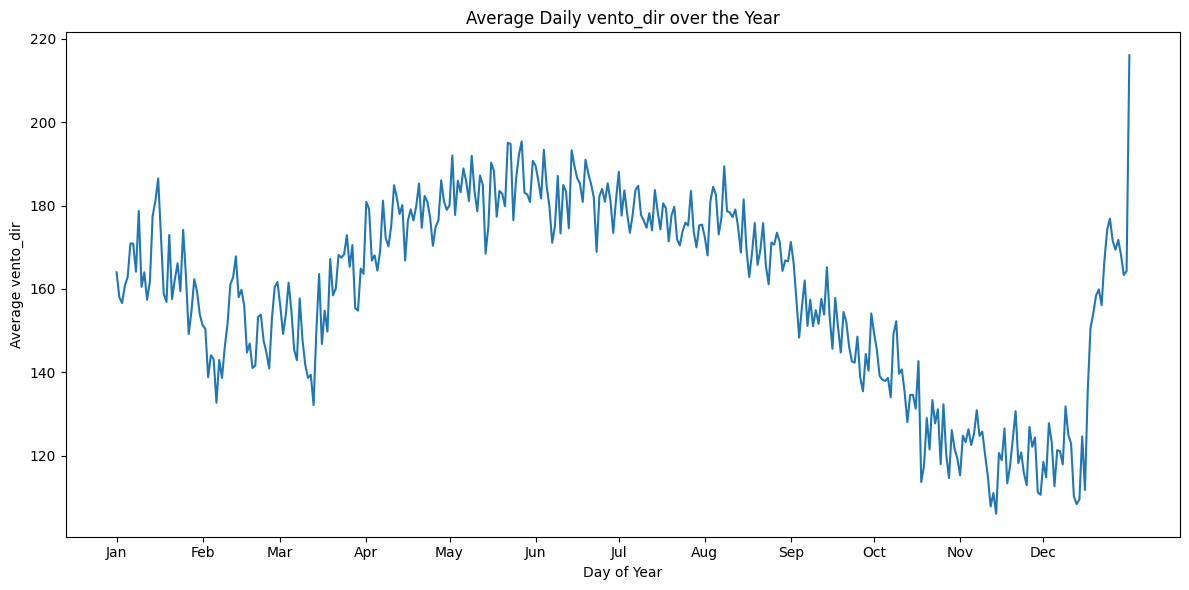

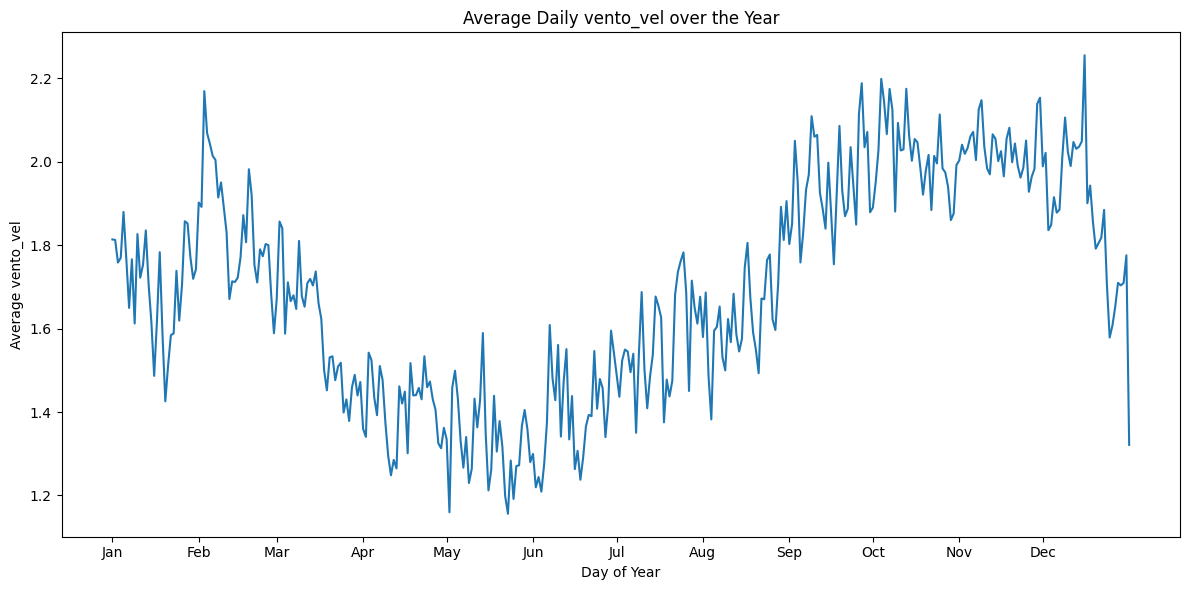

In [ ]:
# prompt: generate a line graph (with seaborn) of the average daily value for each column for each day of the year, based on chuva_summary; generate one graph per variable and only leave out data and hora

chuva_temp = chuva_summary.copy()
chuva_temp['day_of_year'] = pd.to_datetime(chuva_temp['data']).dt.dayofyear

# Group data by 'day_of_year' and calculate the average of each variable
daily_averages = chuva_temp.drop(columns=['hora', 'data']).groupby('day_of_year').mean()

# Reshape data for plotting
daily_averages = daily_averages.reset_index().melt(id_vars=['day_of_year'], var_name='Variable', value_name='Average')

months_first_day = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create line plots for each variable
for variable in daily_averages['Variable'].unique():
    plt.figure(figsize=(12, 6))
    subset = daily_averages[daily_averages['Variable'] == variable]
    sns.lineplot(x='day_of_year', y='Average', data=subset)
    plt.title(f'Average Daily {variable} over the Year')
    plt.xlabel('Day of Year')
    plt.ylabel(f'Average {variable}')
    plt.xticks(months_first_day, months_labels)
    plt.tight_layout()
    plt.show()

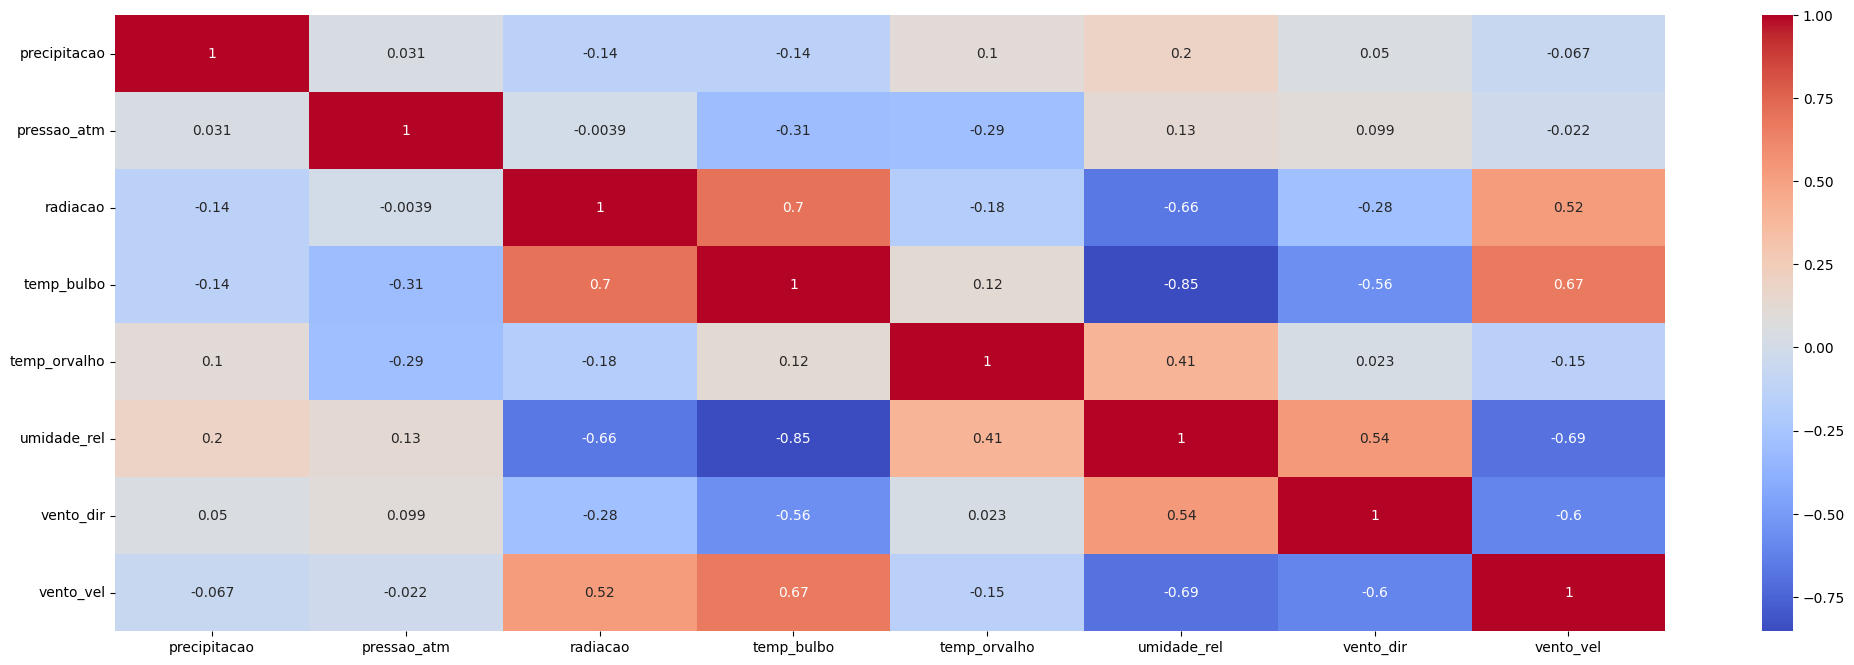

In [ ]:
chuva_inter_corr = chuva_summary.drop(columns=['data', 'hora']).corr()
plt.figure(figsize=(25, 8))
sns.heatmap(chuva_inter_corr, annot=True, cmap='coolwarm')
plt.show()

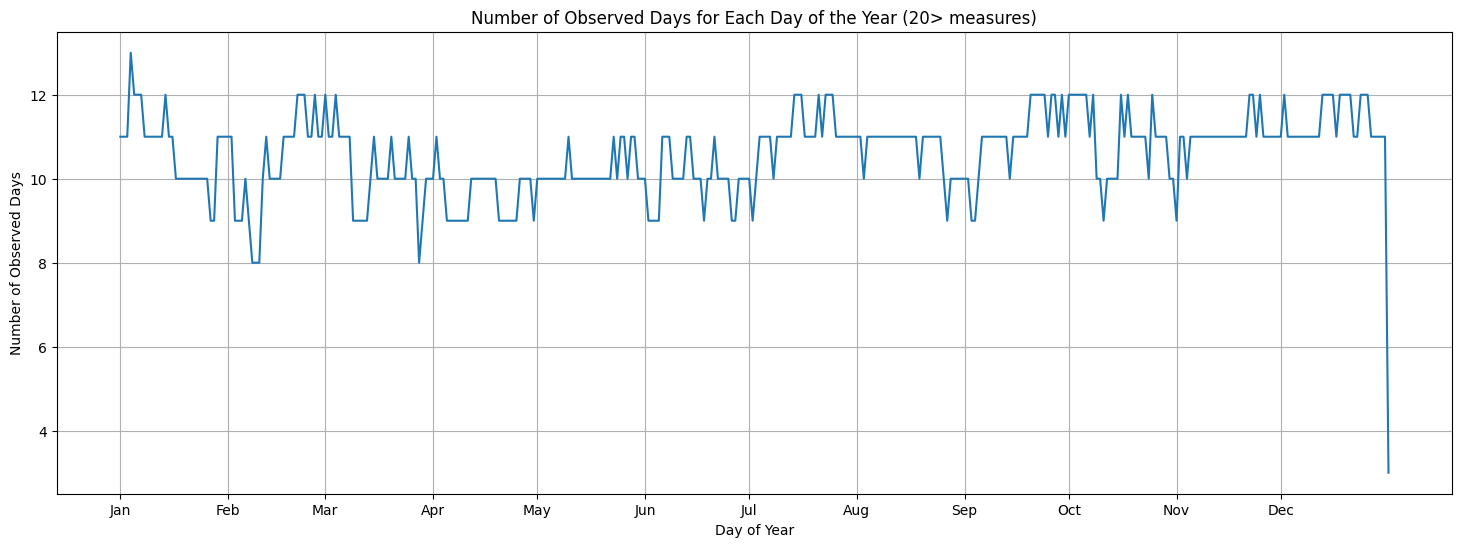

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# prompt: try dropping all nan values from chuva_summary and then display on a graph the amount of observed days (grouped by date) by day of year that had at least 20 hourly observations

# chuva_plot = chuva_summary.drop(columns=['radiacao']).dropna()
chuva_plot = chuva_summary.drop(columns=['radiacao']).dropna()

chuva_plot = chuva_plot.groupby('data', as_index=False).size()
chuva_plot.columns = ['data', 'hora_count']

chuva_plot['data'] = pd.to_datetime(chuva_plot['data'])

chuva_plot = chuva_plot[chuva_plot['hora_count'] >= 20]

chuva_plot = chuva_plot.groupby(chuva_plot['data'].dt.dayofyear).size().reset_index(name='observed_days')

months_first_day = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(chuva_plot['data'], chuva_plot['observed_days'])
plt.xlabel('Day of Year')
plt.ylabel('Number of Observed Days')
plt.title('Number of Observed Days for Each Day of the Year (20> measures)')
plt.grid(True)
plt.xticks(months_first_day, months_labels)
plt.show()
plt

# Tratamento de features (I)
* Exclusão da coluna radiação (muitos dados ausentes)
* Conversão da direção do vento para categórica (oito pontos cardinais)

In [ ]:
chuva_summary = pd.read_csv(os.path.join(intermediate_path, 'chuva_summary.csv'))
chuva_summary['data'] = pd.to_datetime(chuva_summary['data'])

In [ ]:
chuva_clean = chuva_summary.drop(columns='radiacao').dropna()

directions = [
    (337.5, 360, "N"),  # Wrap-around case
    (1, 22.5, "N"),
    (22.5, 67.5, "NE"),
    (67.5, 112.5, "E"),
    (112.5, 157.5, "SE"),
    (157.5, 202.5, "S"),
    (202.5, 247.5, "SW"),
    (247.5, 292.5, "W"),
    (292.5, 337.5, "NW")
]

def map_direction(degree):
    # Validate input
    if degree < 1 or degree > 360:
        return "Unknown"

    # Wrap-around: handle 360 degrees explicitly
    if degree == 360:
        return "N"

    # Iterate through ranges
    for start, end, direction in directions:
        if start <= degree < end:
            return direction
    return "Unknown"

chuva_clean['vento_dir'] = chuva_clean['vento_dir'].apply(map_direction)

# categorize vento_dir into one of the eight directions (considering the degree value)
print(chuva_clean.dtypes)

chuva_clean

data            datetime64[ns]
hora                     int64
precipitacao           float64
pressao_atm            float64
temp_bulbo             float64
temp_orvalho           float64
umidade_rel            float64
vento_dir               object
vento_vel              float64
dtype: object


,data,hora,precipitacao,pressao_atm,temp_bulbo,temp_orvalho,umidade_rel,vento_dir,vento_vel
0,2004-12-31,21,0.0,1012.5,25.8,20.2,71.0,SE,1.4
1,2004-12-31,22,0.0,1012.4,26.0,20.1,70.0,E,2.0
2,2004-12-31,23,0.0,1012.1,25.8,20.2,71.0,E,1.5
3,2005-01-01,0,0.0,1011.8,25.1,20.0,73.0,E,1.3
4,2005-01-01,1,0.0,1011.4,24.8,20.3,76.0,E,0.7
...,...,...,...,...,...,...,...,...,...
111570,2018-12-31,16,0.0,1010.3,29.1,21.5,64.0,E,2.2
111571,2018-12-31,17,0.0,1010.8,28.0,21.4,68.0,E,1.9
111572,2018-12-31,18,0.0,1011.3,27.1,22.0,74.0,SE,1.6
111573,2018-12-31,19,0.0,1012.2,27.0,22.3,76.0,SE,1.9


# Tratamento de features (II)
* One-hot encoding para direção do vento
* Criação da variável choveu (precipitacao > 0)
* Atribuição de choveu_next (se o dia seguinte foi de chuva) com self join; é a variável dependente
* Variável que mede a distância em dias desde o meio do ano (época mais chuvosa)

<Axes: >

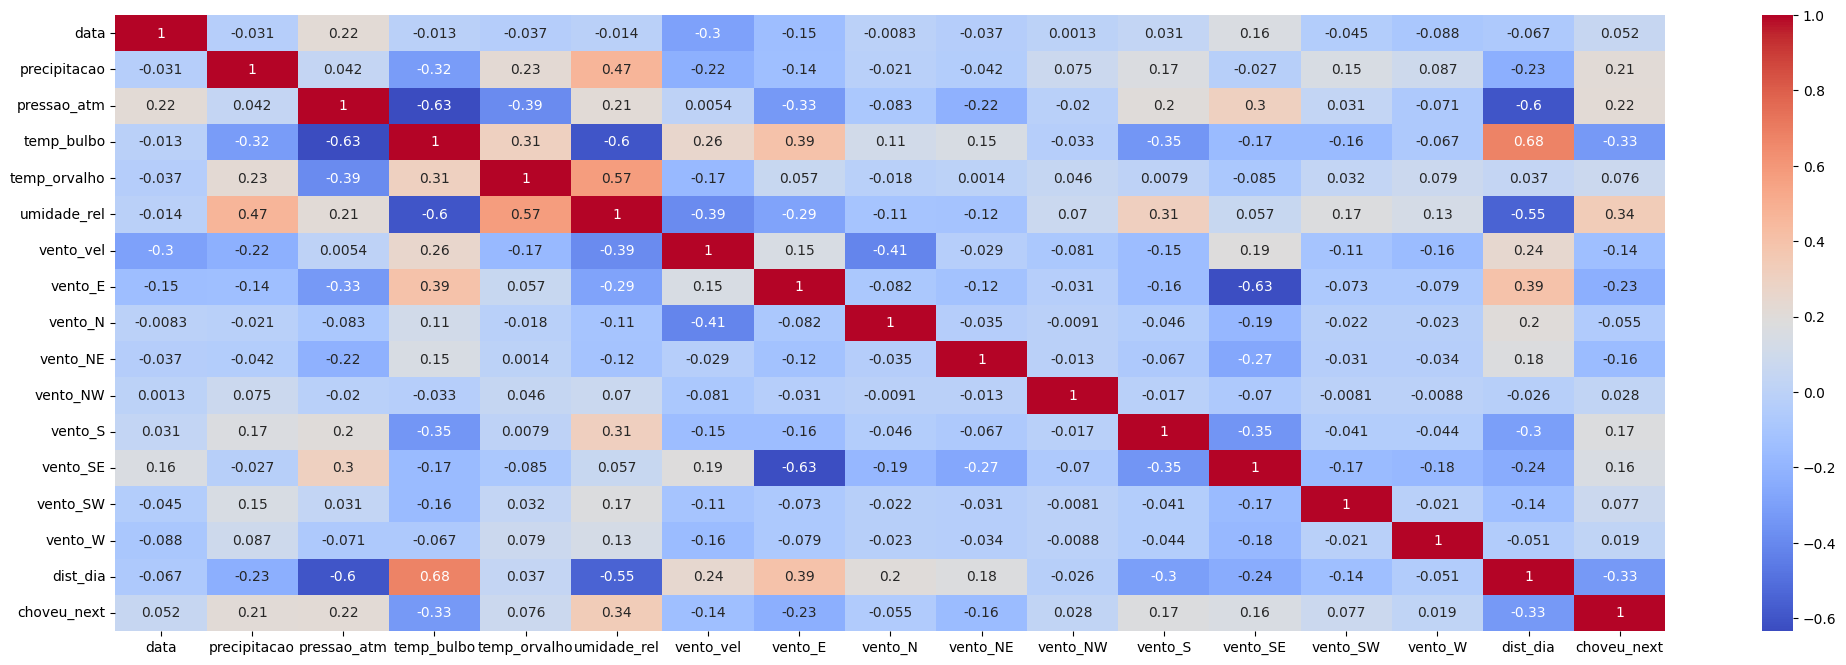

In [ ]:
chuva_corr = chuva_clean.groupby('data', as_index=False).agg(
    count=('hora', 'count'),
    precipitacao=('precipitacao', 'sum'),
    pressao_atm=('pressao_atm', 'mean'),
    temp_bulbo=('temp_bulbo', 'mean'),
    temp_orvalho=('temp_orvalho', 'mean'),
    umidade_rel=('umidade_rel', 'mean'),
    vento_vel=('vento_vel', 'mean'),
    vento_dir=('vento_dir', lambda x: x.mode()[0]),
)

# One-hot encoding for predominant wind direction
wind_dummies = pd.get_dummies(chuva_corr['vento_dir'], prefix='vento')
chuva_corr = pd.concat([chuva_corr, wind_dummies], axis=1)

# Drop the 'vento_dir' column if no longer needed
chuva_corr = chuva_corr.drop(columns=['vento_dir'])

chuva_corr['choveu'] = chuva_corr['precipitacao'] > 0
# Create a column for the next day's date
chuva_corr['data_next'] = chuva_corr['data'] + pd.Timedelta(days=1)

# Add day of the year
chuva_corr['dia_ano'] = chuva_corr['data'].dt.dayofyear

# Count from given date to mid year
mid_year = 365 / 2
chuva_corr['dist_dia'] = abs(chuva_corr['dia_ano'] - mid_year)

# Merge the DataFrame on 'data' and 'data_next'
chuva_corr = pd.merge(
    chuva_corr,
    chuva_corr[['data', 'choveu']],
    left_on='data_next',
    right_on='data',
    how='inner',
    suffixes=('', '_next')
)

chuva_corr.drop(columns=['data_next', 'data_next', 'choveu', 'count', 'dia_ano'], inplace=True)

after_corr = chuva_corr.corr()
plt.figure(figsize=(25, 8))
sns.heatmap(after_corr, annot=True, cmap='coolwarm')

# Tratamento de features (III)
* Adicionando componentes com lag para as maiores correlações (temperatura de bulbo seco, umidade relativa, precipitacao) - pressao atmosférica omitida pois o lag tinha correlação muito alta com o próprio dia

In [ ]:
lagged = chuva_corr.copy()

lagged['data_prev'] = lagged['data'] + pd.Timedelta(days=-1)
lagged = pd.merge(
    lagged,
    lagged[['data', 'temp_bulbo', 'umidade_rel', 'precipitacao']].rename(columns={
        'data': 'data_prev',
        'temp_bulbo': 'temp_bulbo_lag',
        'umidade_rel': 'umidade_rel_lag',
        'precipitacao': 'precipitacao_lag'
    }),
    on='data_prev',
    how='left'
)

lagged.drop(columns=['data_prev', 'data_prev'], inplace=True)

lagged.dropna(inplace=True)

lagged.to_csv(os.path.join(intermediate_path, 'chuva_lagged.csv'), index=False)

display(lagged.head())

print(lagged.shape)

,data,precipitacao,pressao_atm,temp_bulbo,temp_orvalho,umidade_rel,vento_vel,vento_E,vento_N,vento_NE,vento_NW,vento_S,vento_SE,vento_SW,vento_W,dist_dia,choveu_next,temp_bulbo_lag,umidade_rel_lag,precipitacao_lag
1,2005-01-01,0.0,1011.941667,26.641667,19.654167,66.916667,2.250000,True,False,False,False,False,False,False,False,181.5,False,25.866667,70.666667,0.0
2,2005-01-02,0.0,1013.041667,27.270833,20.420833,67.000000,2.437500,True,False,False,False,False,False,False,False,180.5,False,26.641667,66.916667,0.0
3,2005-01-03,0.0,1013.145833,27.820833,20.420833,64.666667,3.066667,False,False,False,False,False,True,False,False,179.5,True,27.270833,67.000000,0.0
4,2005-01-04,11.8,1012.233333,26.687500,21.395833,73.000000,2.762500,True,False,False,False,False,False,False,False,178.5,False,27.820833,64.666667,0.0
5,2005-01-05,0.0,1011.804167,27.075000,19.837500,65.208333,2.675000,True,False,False,False,False,False,False,False,177.5,False,26.687500,73.000000,11.8


(4080, 20)


# Visualizando o dataset final
* Proporção dos valores da categoria de interesse
* Observações por ano e dia do ano

In [ ]:
lagged = pd.read_csv(os.path.join(intermediate_path, 'chuva_lagged.csv'))
lagged['data'] = pd.to_datetime(lagged['data'])
lagged.head()

,data,precipitacao,pressao_atm,temp_bulbo,temp_orvalho,umidade_rel,vento_vel,vento_E,vento_N,vento_NE,vento_NW,vento_S,vento_SE,vento_SW,vento_W,dist_dia,choveu_next,temp_bulbo_lag,umidade_rel_lag,precipitacao_lag
0,2005-01-01,0.0,1011.941667,26.641667,19.654167,66.916667,2.250000,True,False,False,False,False,False,False,False,181.5,False,25.866667,70.666667,0.0
1,2005-01-02,0.0,1013.041667,27.270833,20.420833,67.000000,2.437500,True,False,False,False,False,False,False,False,180.5,False,26.641667,66.916667,0.0
2,2005-01-03,0.0,1013.145833,27.820833,20.420833,64.666667,3.066667,False,False,False,False,False,True,False,False,179.5,True,27.270833,67.000000,0.0
3,2005-01-04,11.8,1012.233333,26.687500,21.395833,73.000000,2.762500,True,False,False,False,False,False,False,False,178.5,False,27.820833,64.666667,0.0
4,2005-01-05,0.0,1011.804167,27.075000,19.837500,65.208333,2.675000,True,False,False,False,False,False,False,False,177.5,False,26.687500,73.000000,11.8


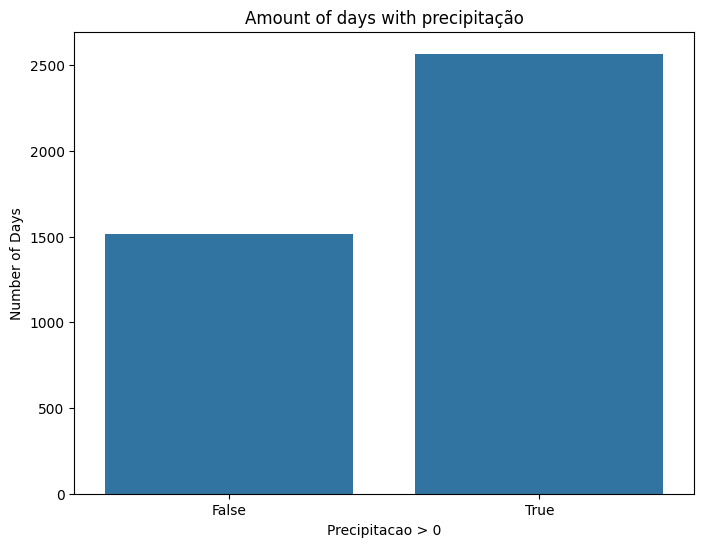

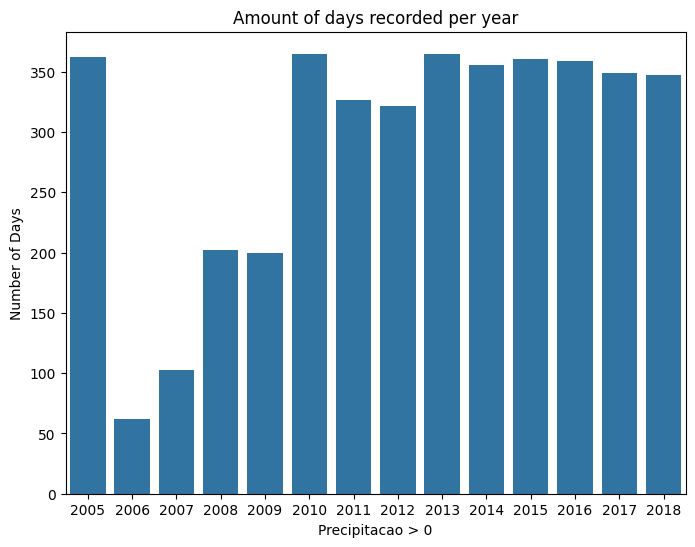

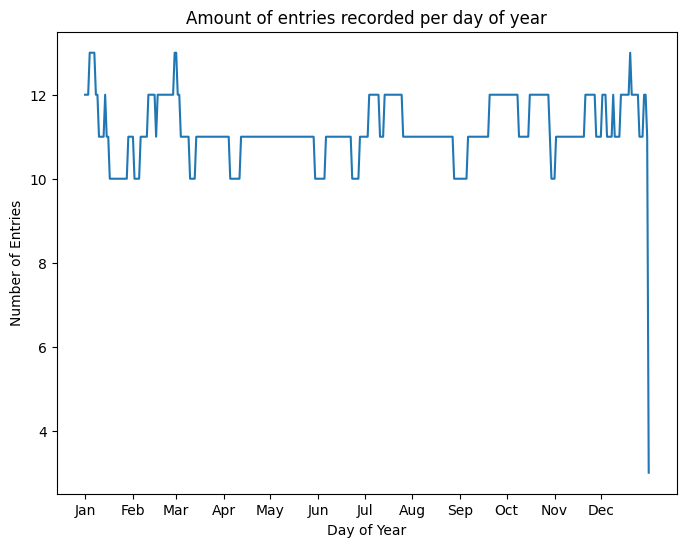

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=lagged['choveu_next'])
plt.title('Amount of days with precipitação')
plt.xlabel('Precipitacao > 0')
plt.ylabel('Number of Days')
plt.show()

print('\n')
print("="*100)
print('\n')

plt.figure(figsize=(8, 6))
sns.countplot(x=lagged['data'].dt.year)
plt.title('Amount of days recorded per year')
plt.xlabel('Precipitacao > 0')
plt.ylabel('Number of Days')
plt.show()

print('\n')
print("="*100)
print('\n')

# Group by day of year and count entries
entries_per_dayofyear = lagged.groupby(lagged['data'].dt.dayofyear).size().reset_index()

# Rename columns for clarity
entries_per_dayofyear.columns = ['dayofyear', 'count']

months_first_day = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='dayofyear', y='count', data=entries_per_dayofyear)
plt.title('Amount of entries recorded per day of year')
plt.xlabel('Day of Year')
plt.ylabel('Number of Entries')
plt.xticks(months_first_day, months_labels)
plt.show()

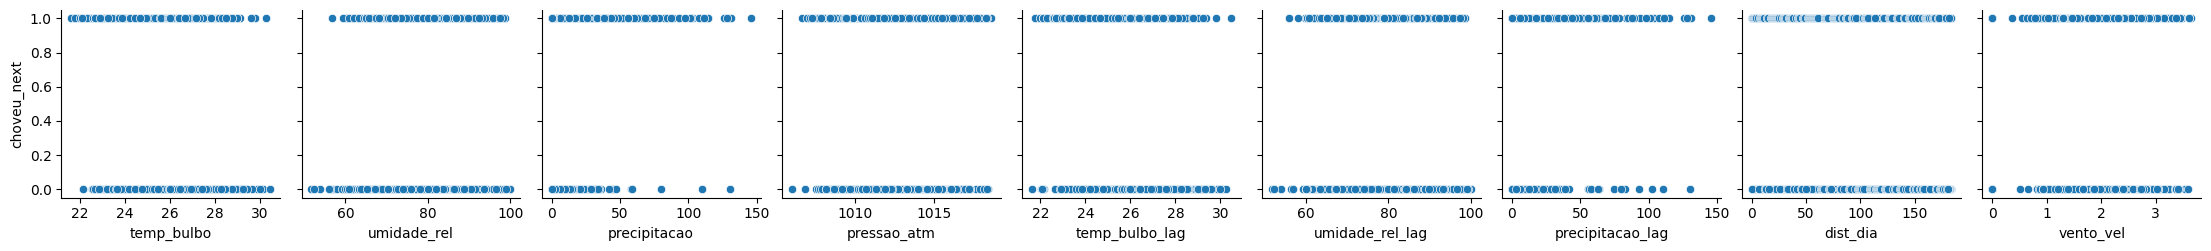

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for the pairplot
features_to_plot = ['temp_bulbo', 'umidade_rel', 'precipitacao', 'pressao_atm', 'temp_bulbo_lag', 'umidade_rel_lag', 'precipitacao_lag', 'dist_dia', 'vento_vel']

# Create the pairplot
sns.pairplot(data=lagged, x_vars=features_to_plot, y_vars=['choveu_next'], kind='scatter')
plt.show()

# Selecionando features mais significativas
* Baseado na magnitude da correlação com a variável de interesse
* Limite mínimo de 0.1

In [ ]:
corr = lagged.corr()

best_corr = corr['choveu_next'].abs().sort_values(ascending=False)
display(best_corr)

best_corr = best_corr[best_corr > 0.1]
display(best_corr)

feats = best_corr.index.tolist()
feats.remove('choveu_next')

print(f"Features selecionadas: {feats}")

,choveu_next
choveu_next,1.000000
umidade_rel,0.344195
dist_dia,0.330828
temp_bulbo,0.328788
temp_bulbo_lag,0.300235
umidade_rel_lag,0.284365
vento_E,0.228376
pressao_atm,0.217974
precipitacao,0.213772
vento_S,0.171007


,choveu_next
choveu_next,1.000000
umidade_rel,0.344195
dist_dia,0.330828
temp_bulbo,0.328788
temp_bulbo_lag,0.300235
umidade_rel_lag,0.284365
vento_E,0.228376
pressao_atm,0.217974
precipitacao,0.213772
vento_S,0.171007


Features selecionadas: ['umidade_rel', 'dist_dia', 'temp_bulbo', 'temp_bulbo_lag', 'umidade_rel_lag', 'vento_E', 'pressao_atm', 'precipitacao', 'vento_S', 'precipitacao_lag', 'vento_NE', 'vento_SE', 'vento_vel']


# Normalização das variáveis contínuas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lagged = pd.read_csv(os.path.join(intermediate_path, 'chuva_lagged.csv'))
lagged['data'] = pd.to_datetime(lagged['data'])



continuous_cols = ['umidade_rel', 'temp_bulbo', 'dist_dia', 'temp_bulbo_lag', 'umidade_rel_lag', 'pressao_atm', 'precipitacao', 'precipitacao_lag', 'vento_vel']  # Continuous columns
categorical_cols = ['vento_E', 'vento_NE', 'vento_S', 'vento_SE']  # One-hot encoded columns

# Separate data
continuous_data = lagged[continuous_cols]
categorical_data = lagged[categorical_cols]

X_scaler = StandardScaler()
continuous_data_scaled = X_scaler.fit_transform(continuous_data)

# Convert scaled data back to DataFrame
continuous_data_scaled = pd.DataFrame(continuous_data_scaled, columns=continuous_cols)

df_scaled = pd.concat([continuous_data_scaled, categorical_data], axis=1)

X = df_scaled
y = lagged['choveu_next']

display(X)

,umidade_rel,temp_bulbo,dist_dia,temp_bulbo_lag,umidade_rel_lag,pressao_atm,precipitacao,precipitacao_lag,vento_vel,vento_E,vento_NE,vento_S,vento_SE
0,-1.326304,0.555960,1.692735,0.017552,-0.816334,-0.373047,-0.418061,-0.416850,0.970829,True,False,False,False
1,-1.315070,0.991119,1.673831,0.553033,-1.321345,0.146497,-0.418061,-0.416850,1.310877,True,False,False,False
2,-1.629602,1.371523,1.654927,0.987752,-1.310122,0.195696,-0.418061,-0.416850,2.451927,False,False,False,True
3,-0.506274,0.587661,1.636022,1.367771,-1.624351,-0.235289,0.488721,-0.416850,1.900293,True,False,False,False
4,-1.556586,0.855673,1.617118,0.584702,-0.502105,-0.437990,-0.418061,0.491431,1.741604,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,-0.860122,-0.262485,1.617118,0.812137,-1.282066,-0.400598,-0.418061,-0.416850,-0.585835,False,False,False,True
4076,-0.635457,0.109274,1.636022,-0.264583,-0.855613,-0.843391,-0.418061,-0.416850,-0.487599,True,False,False,False
4077,-0.371475,0.760572,1.654927,0.106799,-0.631164,-0.683986,-0.218261,-0.416850,-0.087098,False,False,False,True
4078,-1.567819,1.103511,1.673831,0.757437,-0.367436,-0.977213,-0.418061,-0.216720,0.298289,False,False,False,True


# Divisão em treino/teste
* Oversampling com SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np


def split_and_resample(X, y, random_state=None, test_size=0.3, stratify=None):
    samples = {}

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=stratify, random_state=random_state
    )

    # Apply resampling only to the training data
    X_train_oversampled, y_train_oversampled = SMOTE(random_state=random_state).fit_resample(X_train, y_train)
    X_train_undersampled, y_train_undersampled = RandomUnderSampler(random_state=random_state).fit_resample(X_train, y_train)

    # Store results
    samples['X_train_over'] = X_train_oversampled
    samples['y_train_over'] = y_train_oversampled
    samples['X_train_under'] = X_train_undersampled
    samples['y_train_under'] = y_train_undersampled
    samples['X_train'] = X_train
    samples['X_test'] = X_test
    samples['y_train'] = y_train
    samples['y_test'] = y_test

    return samples

samples = split_and_resample(X, y, random_state=42)

print("Y_train original")
class_distribution = pd.Series(samples['y_train']).value_counts(normalize=True)
display(class_distribution)

print("Y_train SMOTE oversampled")
class_distribution_resampled = pd.Series(samples['y_train_over']).value_counts(normalize=True)
display(class_distribution_resampled)

print("Y_train RandomUnderSampled")
class_distribution_resampled = pd.Series(samples['y_train_under']).value_counts(normalize=True)
display(class_distribution_resampled)

print(f"X_train shape: {samples['X_train'].shape}")
print(f"X_train_oversampled shape: {samples['X_train_over'].shape}")
print(f"X_train_undersampled shape: {samples['X_train_under'].shape}")

Y_train original


,proportion
choveu_next,
True,0.627451
False,0.372549


Y_train SMOTE oversampled


,proportion
choveu_next,
True,0.5
False,0.5


Y_train RandomUnderSampled


,proportion
choveu_next,
False,0.5
True,0.5


X_train shape: (2856, 13)
X_train_oversampled shape: (3584, 13)
X_train_undersampled shape: (2128, 13)


# Ajuste de hiperparâmetros
* Modelos escolhidos para ajustar: regressão logística, XGBoost

In [ ]:
samples = split_and_resample(X, y, random_state=42)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define models
models = {
    # 'random_forest': RandomForestClassifier(random_state=42),
    'xgboost': XGBClassifier(eval_metric='logloss', random_state=42),
    'logistic_regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Define hyperparameter grids
param_grids = {
    'random_forest': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(10, 50),
        'model__min_samples_split': randint(2, 10),
        'model__min_samples_leaf': randint(1, 5),
        'model__max_features': ['sqrt', 'log2']
    },
    'xgboost': {
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_depth': [3, 5, 7, 9],
        'model__learning_rate': uniform(0.01, 0.3),  # Continuous range
        'model__subsample': uniform(0.5, 0.5),
        'model__colsample_bytree': uniform(0.5, 0.5),
        'model__gamma': uniform(0, 5)
    },
    'logistic_regression': {
        'model__C': uniform(0.01, 100),
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga']
    }
}

# Run hyperparameter tuning for each model
best_params = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Create pipeline
    pipeline = Pipeline([
        ('resample', SMOTE(random_state=42)),  # Resampling step
        ('model', model)                       # Model step
    ])

    # Randomized search
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[model_name],
        n_iter=100,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=3,
        random_state=42
    )

    # Fit to a representative sample of the data
    random_search.fit(samples['X_train_over'], samples['y_train_over'])

    # Store the best parameters
    best_params[model_name] = random_search.best_params_
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")

Tuning hyperparameters for xgboost...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for xgboost: {'model__colsample_bytree': 0.8059264473611898, 'model__gamma': 0.6974693032602092, 'model__learning_rate': 0.09764339456056544, 'model__max_depth': 9, 'model__n_estimators': 300, 'model__subsample': 0.728034992108518}
Tuning hyperparameters for logistic_regression...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for logistic_regression: {'model__C': 59.87584841970366, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [ ]:
best_params

{'xgboost': {'model__colsample_bytree': 0.8059264473611898,
  'model__gamma': 0.6974693032602092,
  'model__learning_rate': 0.09764339456056544,
  'model__max_depth': 9,
  'model__n_estimators': 300,
  'model__subsample': 0.728034992108518},
 'logistic_regression': {'model__C': 59.87584841970366,
  'model__penalty': 'l1',
  'model__solver': 'saga'}}

# Performance dos modelos com N amostras aleatórias
* LogReg e XGBoost, em comparação com um baseline (classificador aleatório com conhecimento das proporções)
* Coleta de acurácia, precisão, recall, f1
* Coleta do valor predito e do valor real

In [ ]:
best_params_hardcode = {
    'xgboost': {'model__colsample_bytree': 0.8059264473611898, 'model__gamma': 0.6974693032602092, 'model__learning_rate': 0.09764339456056544, 'model__max_depth': 9, 'model__n_estimators': 300, 'model__subsample': 0.728034992108518},
    'logistic_regression': {'model__C': 59.87584841970366, 'model__penalty': 'l1', 'model__solver': 'saga'}
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def random_classifier(y_true, random_state=None):
  rng = np.random.default_rng(random_state)
  class_probs = np.bincount(y_true) / len(y_true)
  y_pred_random = np.random.choice(np.arange(len(class_probs)), size=len(y_true), p=class_probs)
  return y_pred_random

def get_xgb():
  return XGBClassifier(eval_metric='logloss').set_params(**{k.split('__')[1]: v for k, v in best_params_hardcode['xgboost'].items()})

def get_logreg():
  return LogisticRegression(max_iter=1000).set_params(**{k.split('__')[1]: v for k, v in best_params_hardcode['logistic_regression'].items()})

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
sim_number = 30

results = {
    'model': [],
    'sim': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'y_true': [],
    'prediction': []
}

models = {
    'XGBoost_tuned': get_xgb(),
    'XGBoost_untuned': XGBClassifier(eval_metric='logloss'),
    'Logistic_Regression_tuned': get_logreg(),
    'Logistic_Regression_untuned': LogisticRegression(max_iter=1000)
}

for sim in range(sim_number):
    samples = split_and_resample(X, y, random_state=None)

    y_pred_random = random_classifier(samples['y_test'])
    results['model'].append('Random Classifier')
    results['sim'].append(sim)
    results['accuracy'].append(accuracy_score(samples['y_test'], y_pred_random))
    results['f1'].append(f1_score(samples['y_test'], y_pred_random))
    results['precision'].append(precision_score(samples['y_test'], y_pred_random))
    results['recall'].append(recall_score(samples['y_test'], y_pred_random))
    results['prediction'].append(y_pred_random)
    results['y_true'].append(samples['y_test'])

    # Iterate through model names and instances
    for model_name, model_instance in models.items():
        # Fit and predict using the model instance
        y_pred = model_instance.fit(samples['X_train_over'], samples['y_train_over']).predict(samples['X_test'])
        results['model'].append(model_name)  # Use model_name for consistency
        results['sim'].append(sim)
        results['accuracy'].append(accuracy_score(samples['y_test'], y_pred))
        results['f1'].append(f1_score(samples['y_test'], y_pred))
        results['precision'].append(precision_score(samples['y_test'], y_pred))
        results['recall'].append(recall_score(samples['y_test'], y_pred))
        results['prediction'].append(y_pred)
        results['y_true'].append(samples['y_test'])

In [ ]:
results_df = pd.DataFrame(results)
results_df

,model,sim,accuracy,precision,recall,f1,y_true,prediction
0,Random Classifier,0,0.535948,0.631918,0.635188,0.633548,1028 True 3983 False 881 False 2193...,"[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
1,XGBoost_tuned,0,0.718954,0.788694,0.758085,0.773087,1028 True 3983 False 881 False 2193...,"[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
2,XGBoost_untuned,0,0.715686,0.787551,0.752911,0.769841,1028 True 3983 False 881 False 2193...,"[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
3,Logistic_Regression_tuned,0,0.700980,0.829822,0.662354,0.736691,1028 True 3983 False 881 False 2193...,"[True, False, False, True, False, True, False,..."
4,Logistic_Regression_untuned,0,0.702614,0.831442,0.663648,0.738129,1028 True 3983 False 881 False 2193...,"[True, False, False, True, False, True, False,..."
...,...,...,...,...,...,...,...,...
145,Random Classifier,29,0.547386,0.632298,0.663625,0.647583,360 True 1858 False 184 False 1325...,"[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ..."
146,XGBoost_tuned,29,0.703431,0.764398,0.761408,0.762900,360 True 1858 False 184 False 1325...,"[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, ..."
147,XGBoost_untuned,29,0.683824,0.752660,0.737940,0.745227,360 True 1858 False 184 False 1325...,"[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ..."
148,Logistic_Regression_tuned,29,0.689542,0.810594,0.658409,0.726619,360 True 1858 False 184 False 1325...,"[False, False, True, False, False, True, False..."


# Médias das métricas e intervalo de confiança
* Médias das métricas observadas nas 30 simulações
  * Accuracy: predições corretas / predições totais
  * Recall: TP / TP + FN (de todos os positivos de fato, quantos foram identificados)
  * Precision: TP / TP + FP (o quanto os preditos positivos eram positivos de fato)
* Cálculo de intervalo de confiança para os valores identificados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df.drop(columns=['sim', 'y_true', 'prediction']).groupby('model').mean()
# print(results_df['y_true'].values[0])

,accuracy,precision,recall,f1
model,,,,
Logistic_Regression_tuned,0.687282,0.804772,0.663532,0.727168
Logistic_Regression_untuned,0.688045,0.805874,0.663671,0.727698
Random Classifier,0.534450,0.628970,0.631254,0.630015
XGBoost_tuned,0.707271,0.774677,0.753655,0.763814
XGBoost_untuned,0.698693,0.768704,0.744976,0.756471


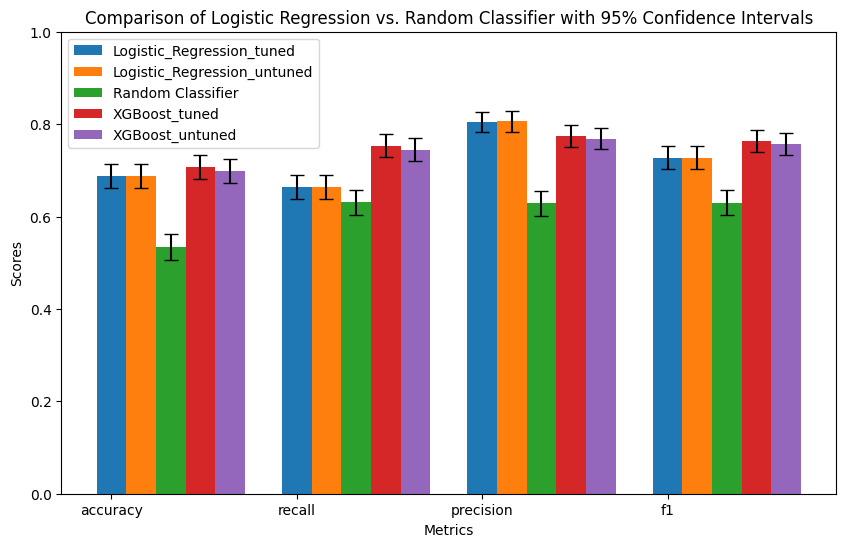

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
confidence_level = 0.95
z_value = norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score for 95% confidence

# Function to calculate confidence interval for proportions
def calculate_ci(metric, n, z_value):
    std_error = np.sqrt((metric * (1 - metric)) / n)
    margin_of_error = z_value * std_error
    lower_bound = metric - margin_of_error
    upper_bound = metric + margin_of_error
    return lower_bound, upper_bound

# Calculate each metric
metrics = ['accuracy', 'recall', 'precision', 'f1']
metric_values = results_df.drop(columns=['sim', 'y_true', 'prediction']).groupby('model').mean().to_dict(orient='index')

# print(metric_values)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Calculate confidence intervals
ci_bounds = {
    k: [] for k in metric_values.keys()
}
n = len(samples['y_test'])  # Total number of observations
for model in metric_values:
    for metric in metrics:  # Iterate directly through metrics
        value = metric_values[model][metric]  # Access value using metric as key
        ci_bounds[model].append(calculate_ci(value, n, z_value))

# --- Changes for grouping by metric ---
num_models = len(metric_values)
bar_width = 0.8 / num_models  # Adjust width for multiple models per metric
x_pos = np.arange(len(metrics))

for i, model in enumerate(metric_values):
    model_means = [metric_values[model][metric] for metric in metrics]
    model_errors = [(metric - lower, upper - metric) for (metric, (lower, upper)) in zip(model_means, ci_bounds[model])]
    ax.bar(x_pos + i * bar_width, model_means, bar_width, label=model, yerr=np.array(model_errors).T, capsize=5)

# Labels and Titles
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression vs. Random Classifier with 95% Confidence Intervals')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

plt.show()

# Definir função para teste de hipótese, comparando as quatro métricas entre dois modelos
* Segundo *Evaluation metrics and statistical tests for machine learning*: https://www.nature.com/articles/s41598-024-56706-x
* Regardless of whether the values of the evaluation metric come from a single test set or several test sets on different iteration rounds, the values of the metric for the two models are based on the same instances and therefore paired. Many researchers therefore check which of the models gives a higher mean and then use a paired t-test to test if the difference in the mean is significant
* "The null hypothesis of the paired t-test is that the mean of the differences in the matched pairs is equal to 0, and this test can be performed with the function ttest_rel in the package scipy.stats in Python [...]. However, the t-test is not recommended for this situation because it is strongly affected by outliers and not valid when resampled test sets are used."
* The best alternative for this situation is the Wilcoxon signed-rank test instead4. It is a non-parametric test for the null hypothesis that the median of the differences in the matched pairs is equal to 0. [...] The Wilcoxon signed-rank test can be performed with wilcoxon in scipy.stats in Python [...]


In [ ]:
from scipy.stats import wilcoxon
import pandas as pd

def one_tailed_wilcoxon_test(df, model1, model2, metrics=['accuracy', 'precision', 'recall', 'f1']):
    """
    Perform one-tailed Wilcoxon signed-rank tests for multiple metrics across simulations.

    Args:
        df (pd.DataFrame): DataFrame containing model performance metrics.
        model1 (str): Name of the first model to compare.
        model2 (str): Name of the second model to compare.
        metrics (list): List of metrics to test (e.g., ['accuracy', 'precision']).

    Returns:
        pd.DataFrame: DataFrame containing the results of the Wilcoxon test for each metric.
    """

    # Explain how to interpret the results of the test
    print(f"Testing whether {model1} has greater metrics than {model2}")
    print("="*50)
    print(f"H0: No significant difference in metric between {model1} and {model2}.")
    print(f"H1: Metric for {model1} is significantly greater than for {model2}.")
    print("="*50)

    results = []

    # Filter the DataFrame for the selected models
    models_to_compare = df[df['model'].isin([model1, model2])]

    # Iterate over each metric
    for metric in metrics:
        scores_model1 = []
        scores_model2 = []

        # Iterate over each simulation
        for sim in models_to_compare['sim'].unique():
            # Get data for this simulation
            sim_data = models_to_compare[models_to_compare['sim'] == sim]

            # Ensure we have both models for this simulation
            if len(sim_data) != 2:
                continue

            # Extract metric values for both models
            score1 = sim_data[sim_data['model'] == model1][metric].values[0]
            score2 = sim_data[sim_data['model'] == model2][metric].values[0]

            # Collect scores for paired testing
            scores_model1.append(score1)
            scores_model2.append(score2)

        # Perform Wilcoxon signed-rank test (one-tailed)
        w_stat, p_value = wilcoxon(scores_model1, scores_model2, alternative='greater')

        # Store results
        results.append({
            'metric': metric,
            'model1': model1,
            'model2': model2,
            'w_stat': w_stat,
            'p_value': p_value,
            'verdict': 'H1 (Significant)' if p_value < 0.05 else 'H0 (Not Significant)'
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results).drop(columns=['model1', 'model2'])
    return results_df

    # # Convert results to a DataFrame
    # results_df = pd.DataFrame(results).groupby(['metric', 'verdict'], as_index=True).agg(results=('verdict', 'count')).reset_index()
    # return results_df

display(one_tailed_wilcoxon_test(results_df, 'Logistic_Regression_untuned', 'Random Classifier'))

Testing whether Logistic_Regression_untuned has greater metrics than Random Classifier
H0: No significant difference in metric between Logistic_Regression_untuned and Random Classifier.
H1: Metric for Logistic_Regression_untuned is significantly greater than for Random Classifier.


,metric,w_stat,p_value,verdict
0,accuracy,465.0,9.313226e-10,H1 (Significant)
1,precision,465.0,9.313226e-10,H1 (Significant)
2,recall,458.0,1.769513e-08,H1 (Significant)
3,f1,465.0,9.313226e-10,H1 (Significant)


# Testes de hipótese
* Sumário dos testes de hipótese (teste Wilcoxon sign-rank, com uma cauda) para cada métrica
* Modelos comparados dois a dois

In [ ]:
# combine all of the models two by two

display(one_tailed_wilcoxon_test(results_df, 'Logistic_Regression_untuned', 'Random Classifier'))
display(one_tailed_wilcoxon_test(results_df, 'XGBoost_untuned', 'Random Classifier'))
display(one_tailed_wilcoxon_test(results_df, 'Logistic_Regression_tuned', 'Logistic_Regression_untuned'))
display(one_tailed_wilcoxon_test(results_df, 'XGBoost_tuned', 'XGBoost_untuned'))
display(one_tailed_wilcoxon_test(results_df, 'XGBoost_untuned', 'Logistic_Regression_untuned'))
display(one_tailed_wilcoxon_test(results_df, 'XGBoost_tuned', 'Logistic_Regression_tuned'))

Testing whether Logistic_Regression_untuned has greater metrics than Random Classifier
H0: No significant difference in metric between Logistic_Regression_untuned and Random Classifier.
H1: Metric for Logistic_Regression_untuned is significantly greater than for Random Classifier.


,metric,w_stat,p_value,verdict
0,accuracy,465.0,9.313226e-10,H1 (Significant)
1,precision,465.0,9.313226e-10,H1 (Significant)
2,recall,458.0,1.769513e-08,H1 (Significant)
3,f1,465.0,9.313226e-10,H1 (Significant)


Testing whether XGBoost_untuned has greater metrics than Random Classifier
H0: No significant difference in metric between XGBoost_untuned and Random Classifier.
H1: Metric for XGBoost_untuned is significantly greater than for Random Classifier.


,metric,w_stat,p_value,verdict
0,accuracy,465.0,9.313226e-10,H1 (Significant)
1,precision,465.0,9.313226e-10,H1 (Significant)
2,recall,465.0,9.313226e-10,H1 (Significant)
3,f1,465.0,9.313226e-10,H1 (Significant)


Testing whether Logistic_Regression_tuned has greater metrics than Logistic_Regression_untuned
H0: No significant difference in metric between Logistic_Regression_tuned and Logistic_Regression_untuned.
H1: Metric for Logistic_Regression_tuned is significantly greater than for Logistic_Regression_untuned.


,metric,w_stat,p_value,verdict
0,accuracy,80.0,0.987854,H0 (Not Significant)
1,precision,74.0,0.999042,H0 (Not Significant)
2,recall,83.0,0.685419,H0 (Not Significant)
3,f1,141.0,0.950959,H0 (Not Significant)


Testing whether XGBoost_tuned has greater metrics than XGBoost_untuned
H0: No significant difference in metric between XGBoost_tuned and XGBoost_untuned.
H1: Metric for XGBoost_tuned is significantly greater than for XGBoost_untuned.


,metric,w_stat,p_value,verdict
0,accuracy,374.0,0.000049,H1 (Significant)
1,precision,392.0,0.000304,H1 (Significant)
2,recall,404.0,0.000028,H1 (Significant)
3,f1,430.0,0.000004,H1 (Significant)


Testing whether XGBoost_untuned has greater metrics than Logistic_Regression_untuned
H0: No significant difference in metric between XGBoost_untuned and Logistic_Regression_untuned.
H1: Metric for XGBoost_untuned is significantly greater than for Logistic_Regression_untuned.


,metric,w_stat,p_value,verdict
0,accuracy,432.5,2.986751e-06,H1 (Significant)
1,precision,0.0,1.000000e+00,H0 (Not Significant)
2,recall,465.0,9.313226e-10,H1 (Significant)
3,f1,465.0,9.313226e-10,H1 (Significant)


Testing whether XGBoost_tuned has greater metrics than Logistic_Regression_tuned
H0: No significant difference in metric between XGBoost_tuned and Logistic_Regression_tuned.
H1: Metric for XGBoost_tuned is significantly greater than for Logistic_Regression_tuned.


,metric,w_stat,p_value,verdict
0,accuracy,435.0,1.275512e-06,H1 (Significant)
1,precision,0.0,1.000000e+00,H0 (Not Significant)
2,recall,465.0,9.313226e-10,H1 (Significant)
3,f1,465.0,9.313226e-10,H1 (Significant)


# Definir função para avaliação de modelo

In [ ]:
def test_model(model, X_test, y_test):
  # Predict on the (undersampled) test set
  y_test_pred = model.predict(X_test)
  y_test_pred_proba = model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_test_pred)
  report = classification_report(y_test, y_test_pred)

  conf_matrix = confusion_matrix(y_test, y_test_pred)

  print("Accuracy:", accuracy)
  print("\nClassification Report:\n", report)

  print("\n")
  print("="*100)
  print("\n")

  # Plot the heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix Heatmap")
  plt.show()

  print("\n")
  print("="*100)
  print("\n")

  conf_matrix_percentage = conf_matrix / np.sum(conf_matrix) * 100

  # Plot the heatmap with percentages
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix Heatmap (Percentage)")
  plt.show()

  print("\n")
  print("="*100)
  print("\n")


  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  print("\n")
  print("="*100)
  print("\n")

  # Fit logistic regression and get prediction probabilities
  y_probs = model.predict_proba(X_test)[:, 1]
  precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

  # Plot precision-recall curve
  plt.figure(figsize=(8, 6))
  plt.plot(thresholds, precisions[:-1], label='Precision')
  plt.plot(thresholds, recalls[:-1], label='Recall')
  plt.xlabel('Threshold')
  plt.ylabel('Precision/Recall')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

# Comparação (métricas e gráficos) entre o modelo com melhor performance (XGBoost_tuned) e o classificador aleatório
* Acurácia e matriz de confusão para o classificador aleatório
* Acurácia, matriz de confusão, curva ROC e curva de precision/recall para o modelo de melhor performance





Classificador aleatório
Accuracy: 0.5285947712418301

Classification Report:
               precision    recall  f1-score   support

       False       0.37      0.40      0.38       449
        True       0.63      0.60      0.62       775

    accuracy                           0.53      1224
   macro avg       0.50      0.50      0.50      1224
weighted avg       0.54      0.53      0.53      1224







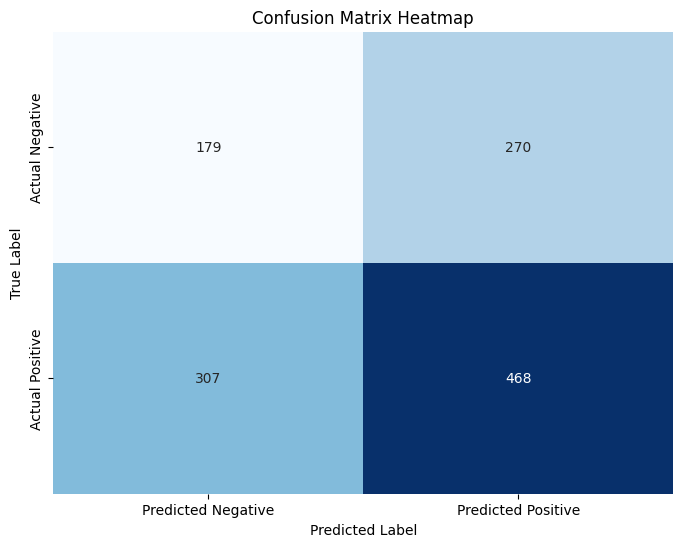

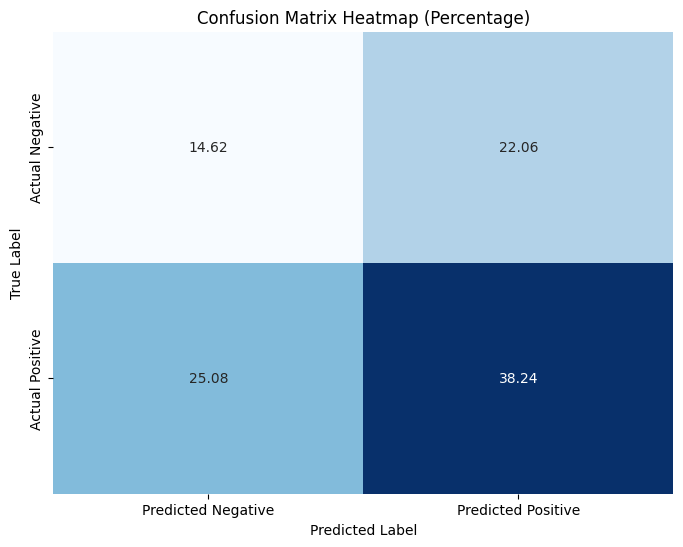

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


samples = split_and_resample(X, y, random_state=42)

y_random = random_classifier(samples['y_test'])

print("\n")
print("="*100)
print("\n")

print("Classificador aleatório")

# Evaluate the model
accuracy = accuracy_score(samples['y_test'], y_random)
report = classification_report(samples['y_test'], y_random)

conf_matrix = confusion_matrix(samples['y_test'], y_random)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

print("\n")
print("="*100)
print("\n")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

conf_matrix_percentage = conf_matrix / np.sum(conf_matrix) * 100


print("\n")
print("="*100)
print("\n")

# Plot the heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.show()

Modelo XGBoost
Accuracy: 0.7091503267973857

Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.63      0.61       449
        True       0.78      0.76      0.77       775

    accuracy                           0.71      1224
   macro avg       0.69      0.69      0.69      1224
weighted avg       0.71      0.71      0.71      1224







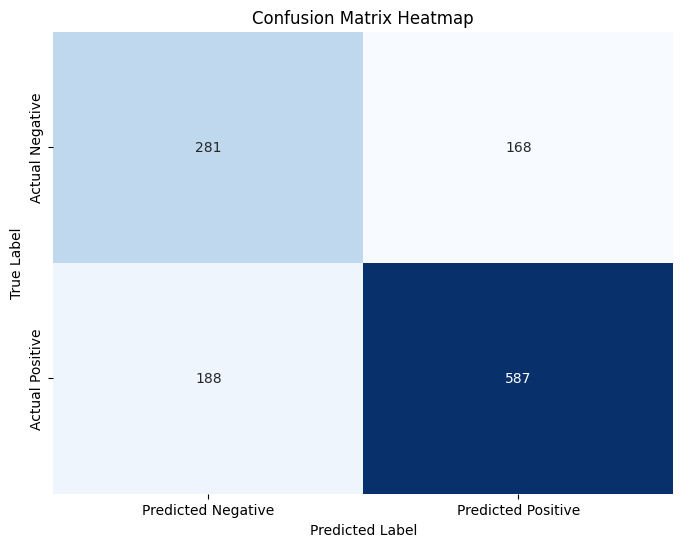

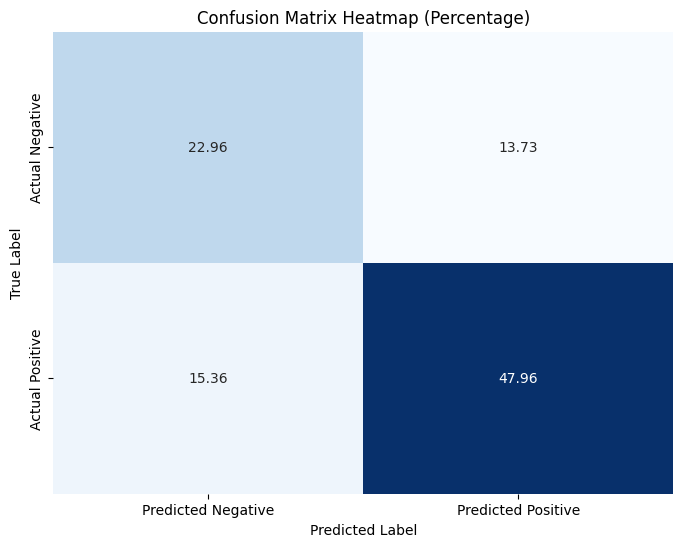

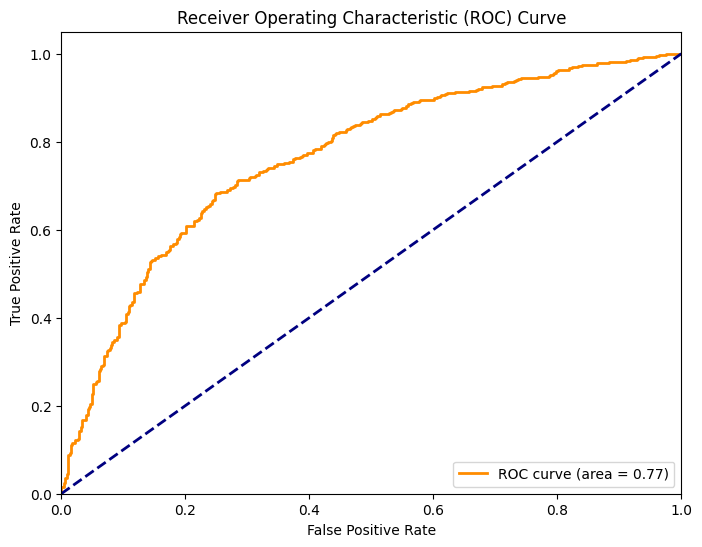

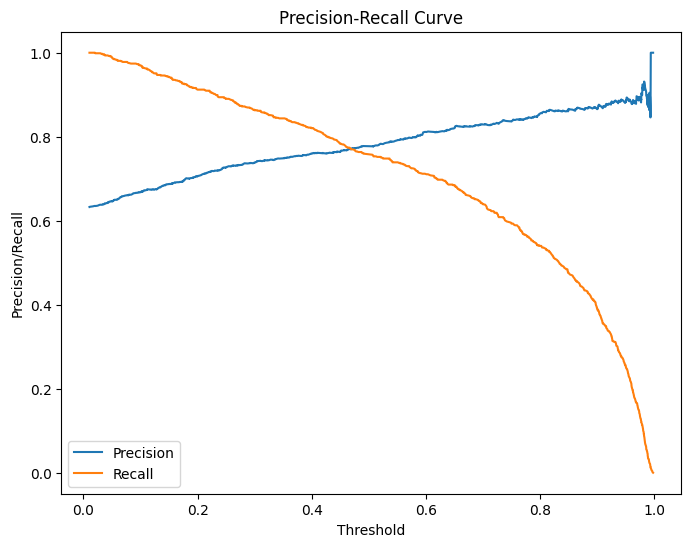

In [ ]:
print("Modelo XGBoost")

model_to_test = get_xgb().fit(samples['X_train_over'], samples['y_train_over'])

test_model(model_to_test, samples['X_test'], samples['y_test'])